In [1]:
from IPython.display import display, HTML
display(HTML('<link rel="preconnect" href="https://fonts.googleapis.com">\
<link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>\
<link href="https://fonts.googleapis.com/css2?family=Comfortaa:wght@300&display=swap" rel="stylesheet">'))

<font face="Comfortaa"><h1> British Airways

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('https://cdn.theforage.com/vinternships/companyassets/tMjbs76F526fF5v3G/L3MQ8f6cYSkfoukmz/1667814300249/customer_booking.csv', encoding='latin-1')

In [4]:
sns.set(rc = {'axes.facecolor':'black'})

<font face="Comfortaa"><h2> 1. Data Exploration

<font face="Comfortaa"><h3> 1.1 Understand Data

In [5]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [7]:
df.describe(include='all')

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000,50000,50000.000000,50000.00000,50000.00000,50000,50000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,NaN,2,3,NaN,NaN,NaN,7,799,104,NaN,NaN,NaN,NaN,NaN
top,NaN,Internet,RoundTrip,NaN,NaN,NaN,Mon,AKLKUL,Australia,NaN,NaN,NaN,NaN,NaN
freq,NaN,44382,49497,NaN,NaN,NaN,8102,2680,17872,NaN,NaN,NaN,NaN,NaN
mean,1.591240,NaN,NaN,84.940480,23.04456,9.06634,NaN,NaN,NaN,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,NaN,NaN,90.451378,33.88767,5.41266,NaN,NaN,NaN,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,NaN,NaN,0.000000,0.00000,0.00000,NaN,NaN,NaN,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,NaN,NaN,21.000000,5.00000,5.00000,NaN,NaN,NaN,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,NaN,NaN,51.000000,17.00000,9.00000,NaN,NaN,NaN,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,NaN,NaN,115.000000,28.00000,13.00000,NaN,NaN,NaN,1.000000,1.000000,1.000000,8.830000,0.000000


<font face="Comfortaa"><h4> 1.1.1 Documentation </h4>
    <h5><b>Binary Variable</b></h5>After brief data interpretation, columns <b>wants_extra_baggage</b>, <b>wants_preferred_seat</b> & <b>wants_in_flight_meals</b> & <b>booking_complete</b> are binary variable (categorical) because they have distinct categories or levels, and they are used to indicate the presence or absence of a particular attribute or event. With 50,000 rows of data with multiple binary variables, memory effeciency is important, all of the binary variables are converted to category type in future analysis.
    <h5><b>Categorical Variable</b></h5>Columns <b>sales_channel</b>, <b>trip_type</b>, <b>flight_hour</b>, <b>flight_day</b> will also be converted to category type. <b>flight_hour</b> and <b>flight_day</b> are considered to be categorical as they are nominal. 
    

In [8]:
binary_var = ['wants_extra_baggage','wants_preferred_seat','wants_in_flight_meals', 'booking_complete', 'flight_hour']
categorical_var = ['sales_channel', 'trip_type', 'flight_hour','flight_day']
for col in categorical_var + binary_var:
    df[col] = df[col].astype('category')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   num_passengers         50000 non-null  int64   
 1   sales_channel          50000 non-null  category
 2   trip_type              50000 non-null  category
 3   purchase_lead          50000 non-null  int64   
 4   length_of_stay         50000 non-null  int64   
 5   flight_hour            50000 non-null  category
 6   flight_day             50000 non-null  category
 7   route                  50000 non-null  object  
 8   booking_origin         50000 non-null  object  
 9   wants_extra_baggage    50000 non-null  category
 10  wants_preferred_seat   50000 non-null  category
 11  wants_in_flight_meals  50000 non-null  category
 12  flight_duration        50000 non-null  float64 
 13  booking_complete       50000 non-null  category
dtypes: category(8), float64(1), int64(3), 

<font face="Comfortaa"><h2> 1.2 Basic Statistics

In [10]:
all_columns = df.columns.to_list()
numerical_columns = df.describe().columns.to_list()
categorical_columns = [col for col in all_columns if col not in numerical_columns]

<font face="Comfortaa"><h3> 1.2.1 Numerical

In [11]:
len(numerical_columns)

4

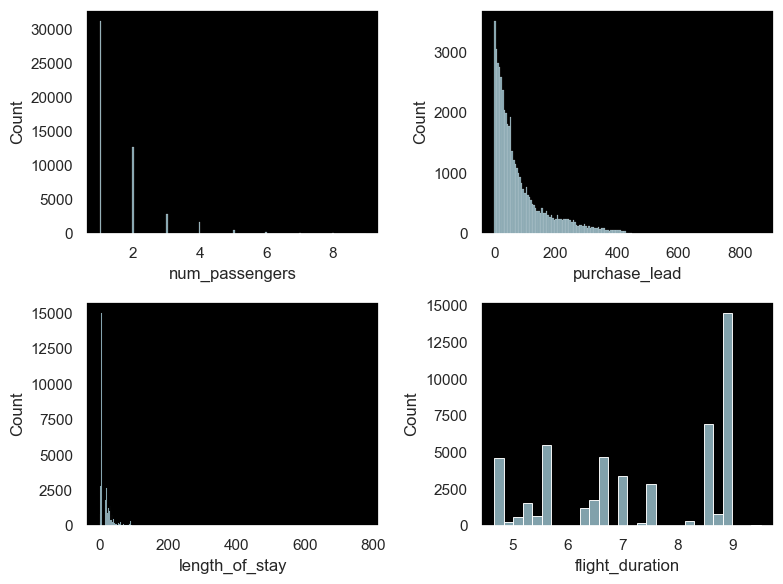

In [12]:
fig, ax = plt.subplots(2,2, figsize=(8,6))
for n, col in enumerate(numerical_columns):
    i = n//2
    j = n%2
    sns.histplot(data = df,\
                 x = col,
                 ax = ax[i,j],
                 color = 'lightblue')
    ax[i,j].grid(False)

plt.tight_layout()
plt.show()

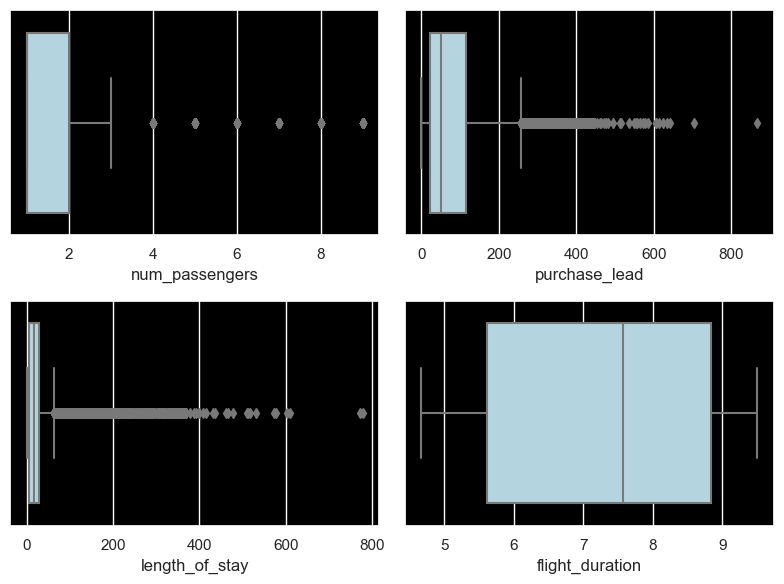

In [13]:
fig, ax = plt.subplots(2,2, figsize=(8,6))
for n, col in enumerate(numerical_columns):
    i = n//2
    j = n%2
    sns.boxplot(data = df,\
                 x = col,
                 ax = ax[i,j],
                 color = 'lightblue')

plt.tight_layout()
plt.show()

<font face="Comfortaa"><h3> 1.2.2 Categorical

In [14]:
all_categorical_columns = categorical_columns

In [15]:
categorical_columns = df.select_dtypes('category').columns

In [16]:
remaining_categorical_columns = [col for col in all_categorical_columns if col not in categorical_columns ]

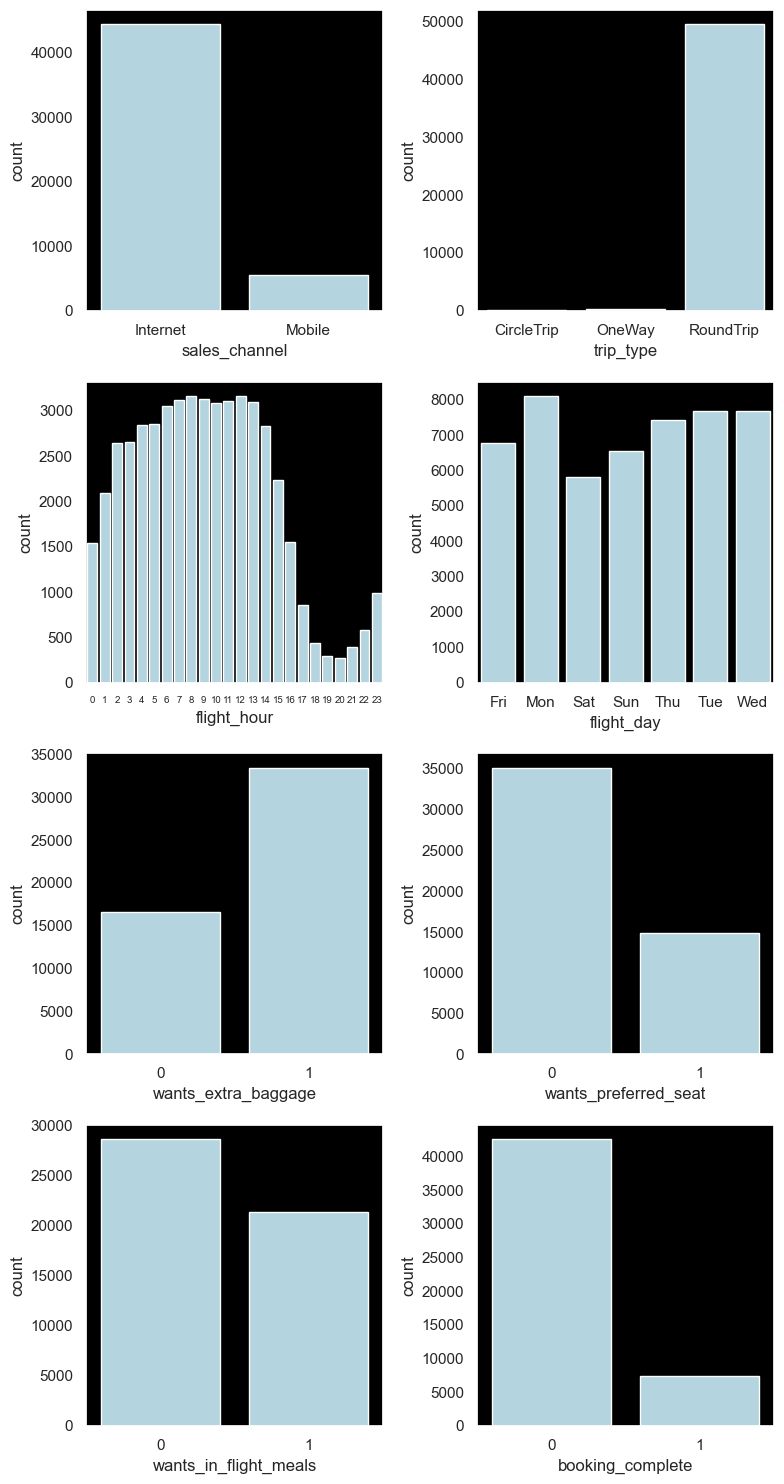

In [17]:
fig, ax = plt.subplots(4,2, figsize=(8,15))
for n, col in enumerate(categorical_columns):
    i = n//2
    j = n%2
    sns.countplot(data=df,\
                  x = col,
                  ax = ax[i,j],
                  color = 'lightblue')
    if col == 'flight_hour':
        ax[i, j].set_xticklabels(ax[i, j].get_xticks(), size = 7)
    ax[i,j].grid(False)

plt.tight_layout()
plt.show()

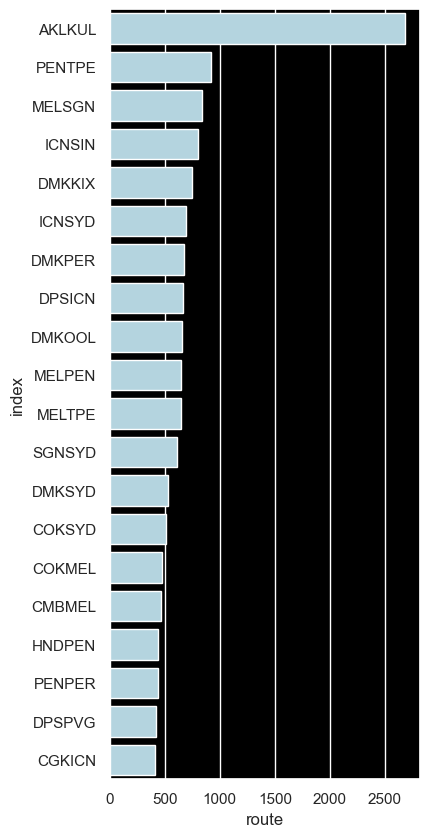

In [18]:
fig, ax = plt.subplots(figsize=(4, 10))
sns.barplot(data = df['route'].value_counts().reset_index().head(20),\
            x = 'route',\
            y ='index',\
            color = 'lightblue')
plt.show()

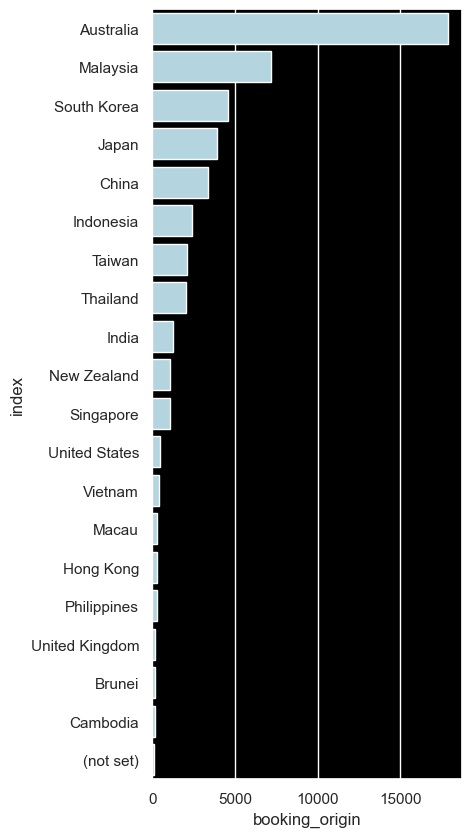

In [19]:
fig, ax = plt.subplots(figsize=(4, 10))
sns.barplot(data = df['booking_origin'].value_counts().reset_index().head(20),\
            x = 'booking_origin',\
            y ='index',\
            color ='lightblue')
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   num_passengers         50000 non-null  int64   
 1   sales_channel          50000 non-null  category
 2   trip_type              50000 non-null  category
 3   purchase_lead          50000 non-null  int64   
 4   length_of_stay         50000 non-null  int64   
 5   flight_hour            50000 non-null  category
 6   flight_day             50000 non-null  category
 7   route                  50000 non-null  object  
 8   booking_origin         50000 non-null  object  
 9   wants_extra_baggage    50000 non-null  category
 10  wants_preferred_seat   50000 non-null  category
 11  wants_in_flight_meals  50000 non-null  category
 12  flight_duration        50000 non-null  float64 
 13  booking_complete       50000 non-null  category
dtypes: category(8), float64(1), int64(3), 

<font face='Comfortaa'>
    The Customer Booking contains <b>50,000</b> rows and <b>14</b> columns with no missing values.<br>
    <br>
    <b>num_passengers:</b>
    <ul><li>Represents the number of passengers for each booking</li>
        <li>A numerical variable</li>
        <li>Ranges between 1 and 9. Outliers are present on the higher end.</li></ul>
    <br>
    <b>sales_channel:</b>
    <ul><li>Represents the channel which the booking was made. </li>
        <li>A categorical variable</li>
        <li>There are 2 distinct categories (eg Internet, Mobile). No typos.</li></ul>  
    <br>
    <b>trip_type:</b>
    <ul><li>Represents the type of trip. </li>
        <li>A categorical variable</li>
        <li>There are 3 distinct categories (eg RoundTrip, OneWay, CircleTrip). No typos.</li></ul>   
    <br>
    <b>purchase_lead:</b>
    <ul><li>Represents the lead time between purchase and the flight date. </li>
        <li>A Numerical variable</li>
        <li>The distribution of purchase_lead is unimodal and extremely right-skewed. Most of the data are between 21 and 115 days. The outliers are present on the higher end.</li></ul>  
    <br>
    <b>length_of_stay:</b>
    <ul><li>Represents the lead time between purchase and the flight date. </li>
        <li>A Numerical variable</li>
        <li>The distribution of purchase_lead is unimodal and extremely right-skewed. Most of the data are between 5 and 27 days. The outliers are present on the higher end.</li></ul>  
    <br>
    <b>flight_hour:</b>
    <ul><li>Represents the hour of the flight. </li>
        <li>A Numerical variable</li>
        <li>The distribution of purchase_lead is unimodal and slightly right-skewed. Most of the data are between 5 and 13 days. The outliers are present on the higher end.</li></ul>          
    <br>
    <b>flight_day:</b>
    <ul><li>Represents the day of the week for the flight. </li>
        <li>A Categorical variable</li>
        <li>There are 7 distinct categories (eg From Monday to Sunday). No typos.</li></ul>          
    <br>
    <b>route:</b>
    <ul><li>Represents the flight route. </li>
        <li>A Categorical variable</li>
        <li>There are 799 distinct categories (eg AKLKUL).</li></ul>       
    <br>
    <b>booking_origin:</b>
    <ul><li>Represents the origin of the booking. </li>
        <li>A Categorical variable</li>
        <li>There are 104 distinct categories (eg Australia).</li></ul>       
    <br>
    <b>wants_extra_baggage:</b>
    <ul><li>Represents the customer preferences on extra baggage. </li>
        <li>A Categorical variable</li>
        <li>Binary Variables 0 or 1.</li></ul>       
    <br>
    <b>wants_extra_baggage:</b>
    <ul><li>Represents the customer preferences on extra baggage. </li>
        <li>A Categorical variable</li>
        <li>Binary Variables 0 or 1. More bookings prefer extra baggage.</li></ul>     
    <br>
    <b>wants_preferred_seat:</b>
    <ul><li>Represents the customer preferences on preferred seat. </li>
        <li>A Categorical variable</li>
        <li>Binary Variables 0 or 1. More bookings prefer no preferred seat.</li></ul>     
     <br>
    <b>wants_in_flight_meals:</b>
    <ul><li>Represents the customer preferences on in-flight meal. </li>
        <li>A Categorical variable</li>
        <li>Binary Variables 0 or 1. More bookings prefer no in-flight meal.</li></ul>    
     <br>
    <b>flight_duration:</b>
    <ul><li>Represents the duration of the flight. </li>
        <li>A Numerical variable</li>
        <li>The distribution of purchase_lead is unimodal and slightly left-skewed. Most of the data are between 5.62 and 8.83 hour. The outliers are present on the lower end.</li></ul>     
      <br>
    <b>booking_complete:</b>
    <ul><li>Represents whether the booking is complete (0 or 1. </li>
        <li>A categorical variable</li>
        <li>More bookings are incomplete.</li></ul>         
        

<font face="Comfortaa"><h2> 2. Data Preparation

In [21]:
target = df['booking_complete'].values

In [22]:
features = df.drop(axis =1, columns=['booking_complete'])
features = pd.get_dummies(features, drop_first=True)
features.head()

,num_passengers,purchase_lead,length_of_stay,flight_duration,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,flight_hour_1,flight_hour_2,flight_hour_3,...,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam,wants_extra_baggage_1,wants_preferred_seat_1,wants_in_flight_meals_1
0,2,262,19,5.52,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,112,20,5.52,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,243,22,5.52,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,1,96,31,5.52,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2,68,22,5.52,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [23]:
features_cat = features.iloc[:,4:]
features_num = features.iloc[:,:4]

In [24]:
X_num = features_num.values
X_cat = features_cat.values

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [26]:
X_num = scaler.fit_transform(X_num)
X = np.concatenate((X_num, X_cat), axis=1)

In [27]:
y = target

<font face="Comfortaa"><h2> 3. Feature Selection

<font face="Comfortaa"><h3> 3.1 PCA

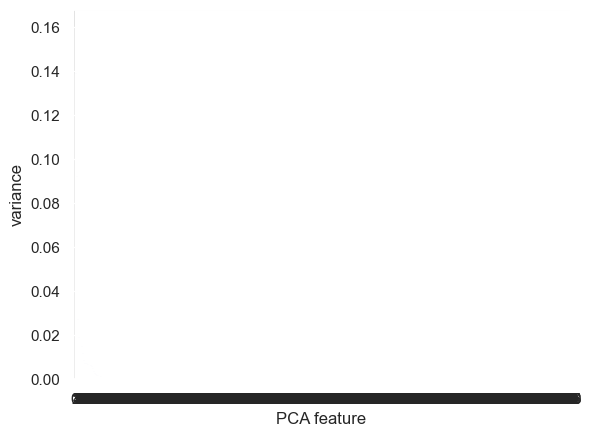

,index,feature_importance
0,0,0.159934
1,1,0.139131
2,2,0.104653
3,3,0.092262
4,4,0.038293


In [28]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

features = range(pca.n_components_)
plt.bar(features[:50], pca.explained_variance_ratio_[:50])
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

feature_importances = pd.DataFrame({"feature_importance" : pca.explained_variance_ratio_}).reset_index()
feature_importances = feature_importances.sort_values(by=["feature_importance"], ascending=False)
feature_importances.head()

<font face="Comfortaa"><h3> 3.2 Random Forest Classifier

<font face="Comfortaa"><h4> 3.2.1 All

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=28)

rf_model.fit(X, y)

# Get feature importances
feature_importances_rf = rf_model.feature_importances_
    
feature_importances_rf_all = pd.DataFrame({"feature_importance" : feature_importances_rf, "model":"rf_all"}).reset_index()
feature_importances_rf_all = feature_importances_rf_all.sort_values(by=["feature_importance"], ascending=False)
feature_importances_rf_all.head()

,index,feature_importance,model
1,1,0.130645,rf_all
2,2,0.102030,rf_all
0,0,0.043597,rf_all
3,3,0.037126,rf_all
884,884,0.026667,rf_all


<font face="Comfortaa"><h3> 3.3 Gradient Boosting Classifier

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=28)

# Fit the model to your data
gb_model.fit(X, y)

# Get feature importances
feature_importances_gb = gb_model.feature_importances_


    
feature_importances_gb_all = pd.DataFrame({"feature_importance" : feature_importances_gb, "model":"gb_all"}).reset_index()
feature_importances_gb_all = feature_importances_gb_all.sort_values(by=["feature_importance"], ascending=False)
feature_importances_gb_all.head()

,index,feature_importance,model
884,884,0.327436,gb_all
837,837,0.162244,gb_all
2,2,0.056149,gb_all
937,937,0.040490,gb_all
918,918,0.035488,gb_all


<font face="Comfortaa"><h2> 4. Model Development

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def scores(y_val, y_pred):
    cm = confusion_matrix(y_val, y_pred)
    tn, fp, fn, tp = cm.ravel()
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0  # Avoid division by zero
    f1 = f1_score(y_val, y_pred)

    # Print the calculated metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall (Sensitivity):", recall)
    print("Specificity:", specificity)
    print("F1-Score:", f1)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

def confusion_matrix_(y_val,y_pred):
    confusion_matrix_ = confusion_matrix(y_val,y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_, display_labels = [False, True])
    cm_display.plot()
    plt. grid(False)
    plt.show()

<font face="Comfortaa"><h3> 4.1 Base Model

<font face="Comfortaa">Logistic regression is a natural starting point for classification tasks. It's simple, interpretable, and well-suited when the relationship between the features and the binary outcome (0 or 1) is approximately linear on the log-odds scale.

Accuracy: 0.8539
Precision: 0.4888888888888889
Recall (Sensitivity): 0.07554945054945054
Specificity: 0.9865402621722846
F1-Score: 0.13087447947650205


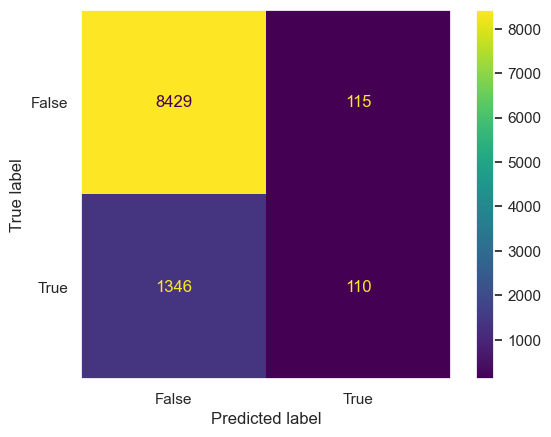

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
LogisticRegression = LogisticRegression(max_iter=1000)
LogisticRegression.fit(X_train, y_train)
y_pred = LogisticRegression.predict(X_val)
scores(y_val, y_pred)
confusion_matrix_(y_val,y_pred) 


<font face="Comfortaa"><h3> 4.2 Feature Selection

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

LogisticRegression
1
Accuracy: 0.8544
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


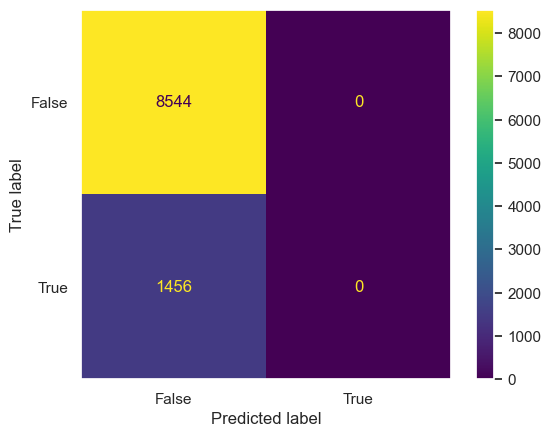

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression
5
Accuracy: 0.8544
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


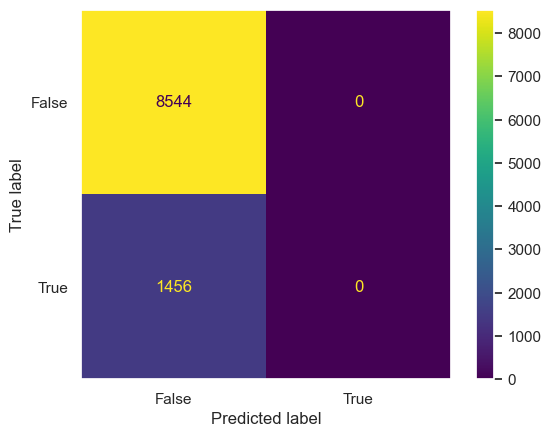

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression
10
Accuracy: 0.8543
Precision: 0.42857142857142855
Recall (Sensitivity): 0.0020604395604395605
Specificity: 0.9995318352059925
F1-Score: 0.004101161995898838


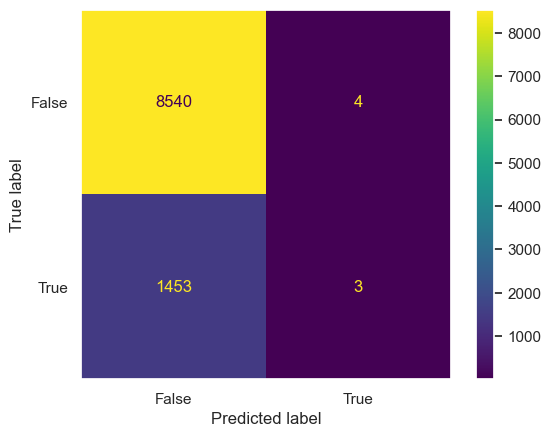

LogisticRegression
20
Accuracy: 0.8547
Precision: 0.5517241379310345
Recall (Sensitivity): 0.01098901098901099
Specificity: 0.9984784644194756
F1-Score: 0.021548821548821553


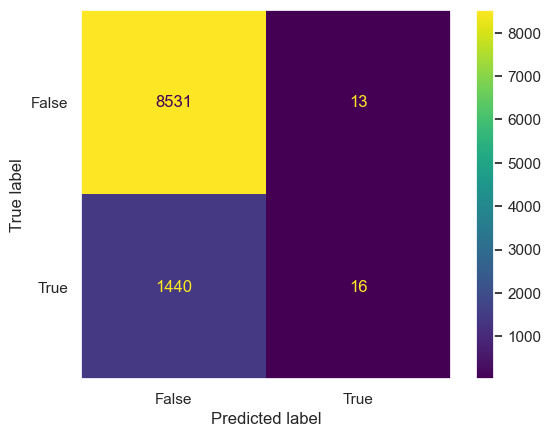

LogisticRegression
50
Accuracy: 0.8522
Precision: 0.4153846153846154
Recall (Sensitivity): 0.03708791208791209
Specificity: 0.9911048689138576
F1-Score: 0.06809583858764187


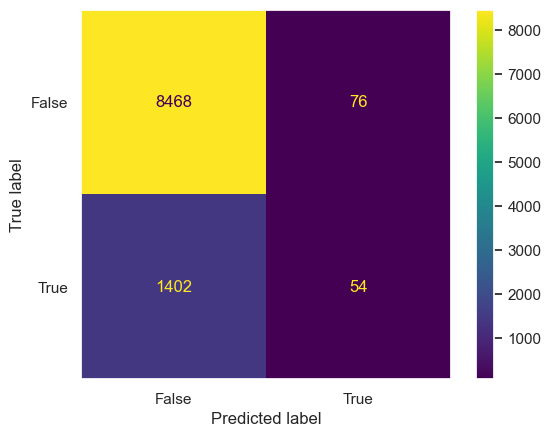

LogisticRegression
150
Accuracy: 0.8534
Precision: 0.47549019607843135
Recall (Sensitivity): 0.06662087912087912
Specificity: 0.9874765917602997
F1-Score: 0.11686746987951807


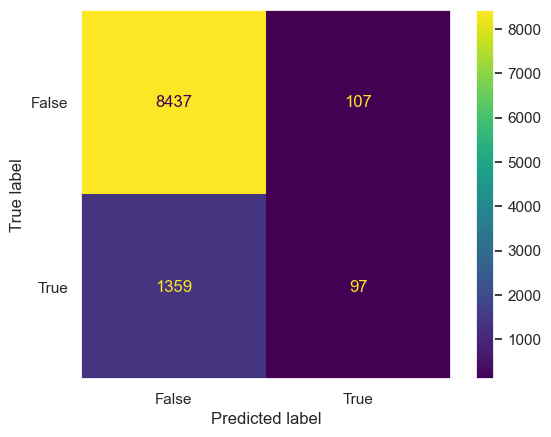

LogisticRegression
300
Accuracy: 0.8542
Precision: 0.49537037037037035
Recall (Sensitivity): 0.07348901098901099
Specificity: 0.9872425093632958
F1-Score: 0.12799043062200957


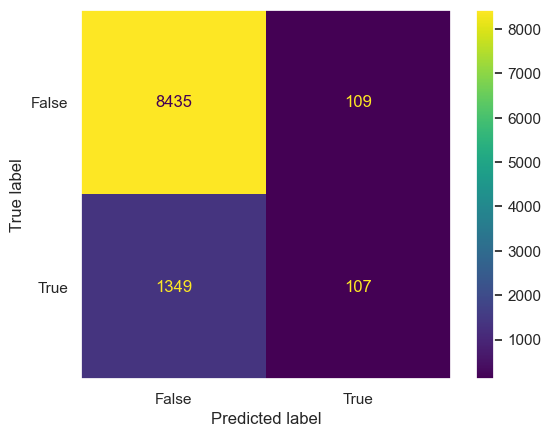

LogisticRegression
500
Accuracy: 0.8536
Precision: 0.4818181818181818
Recall (Sensitivity): 0.07280219780219781
Specificity: 0.9866573033707865
F1-Score: 0.12649164677804298


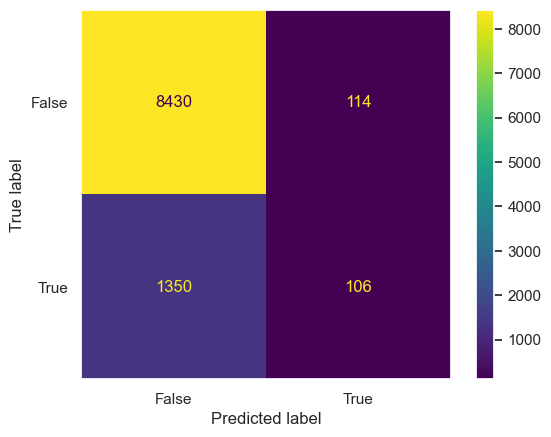

LogisticRegression
700
Accuracy: 0.8539
Precision: 0.48868778280542985
Recall (Sensitivity): 0.07417582417582418
Specificity: 0.9867743445692884
F1-Score: 0.12880143112701253


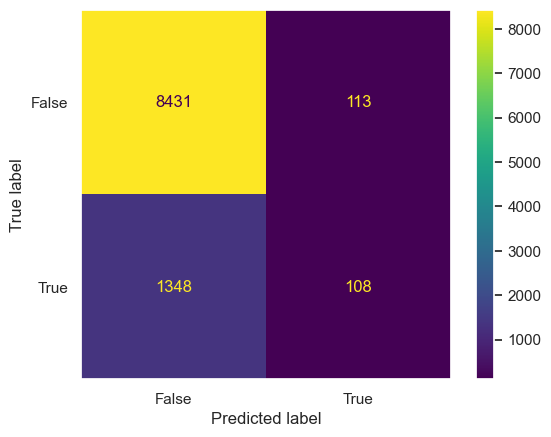

LogisticRegression
900
Accuracy: 0.8539
Precision: 0.4888888888888889
Recall (Sensitivity): 0.07554945054945054
Specificity: 0.9865402621722846
F1-Score: 0.13087447947650205


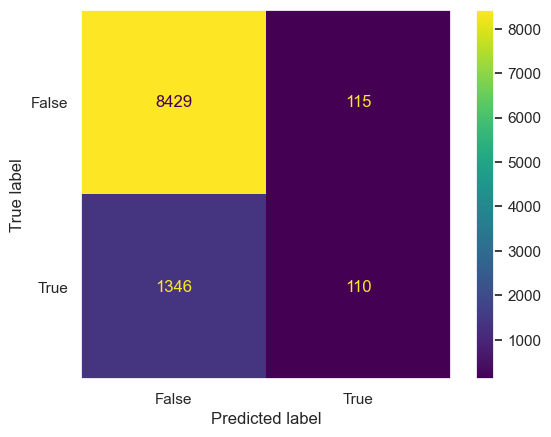

GaussianNB
1
Accuracy: 0.8544
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


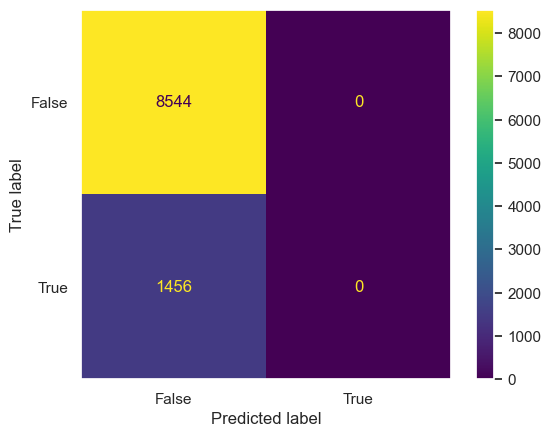

GaussianNB
5
Accuracy: 0.8127
Precision: 0.34635224760501104
Recall (Sensitivity): 0.3228021978021978
Specificity: 0.896184456928839
F1-Score: 0.33416281549946675


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


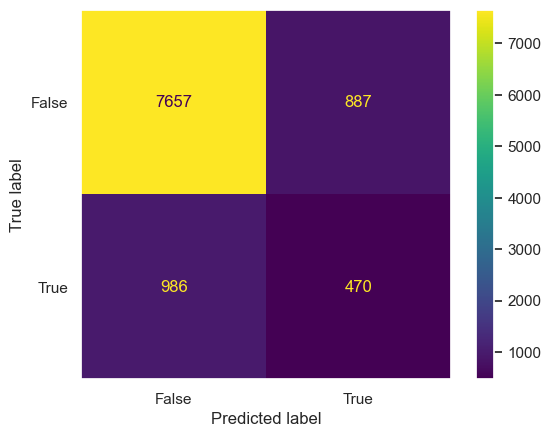

GaussianNB
10
Accuracy: 0.8104
Precision: 0.3414985590778098
Recall (Sensitivity): 0.32554945054945056
Specificity: 0.8930243445692884
F1-Score: 0.3333333333333333


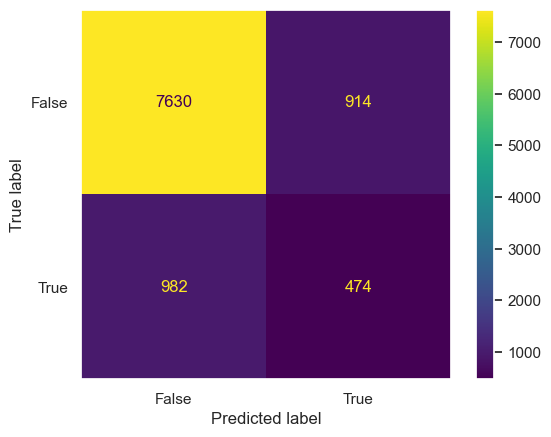

GaussianNB
20
Accuracy: 0.8138
Precision: 0.34805389221556887
Recall (Sensitivity): 0.31936813186813184
Specificity: 0.8980571161048689
F1-Score: 0.3330945558739255


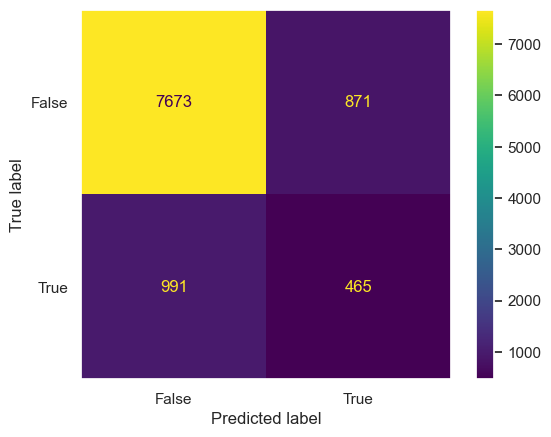

GaussianNB
50
Accuracy: 0.8088
Precision: 0.3146341463414634
Recall (Sensitivity): 0.2657967032967033
Specificity: 0.9013342696629213
F1-Score: 0.2881608339538347


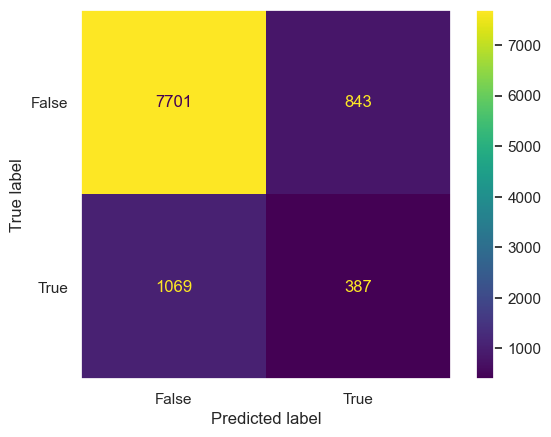

GaussianNB
150
Accuracy: 0.7378
Precision: 0.2783269961977186
Recall (Sensitivity): 0.5027472527472527
Specificity: 0.7778558052434457
F1-Score: 0.3582966226138032


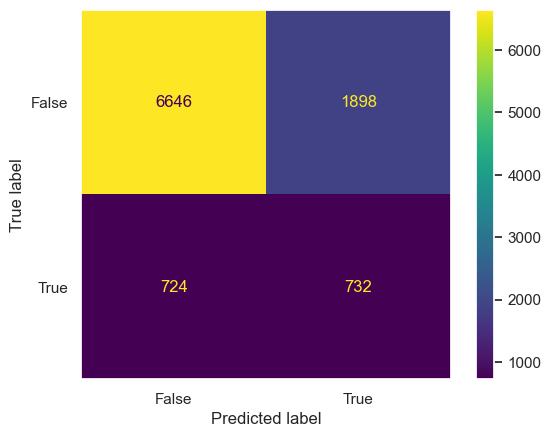

GaussianNB
300
Accuracy: 0.724
Precision: 0.2740817740817741
Recall (Sensitivity): 0.5432692307692307
Specificity: 0.7547986891385767
F1-Score: 0.3643482266236757


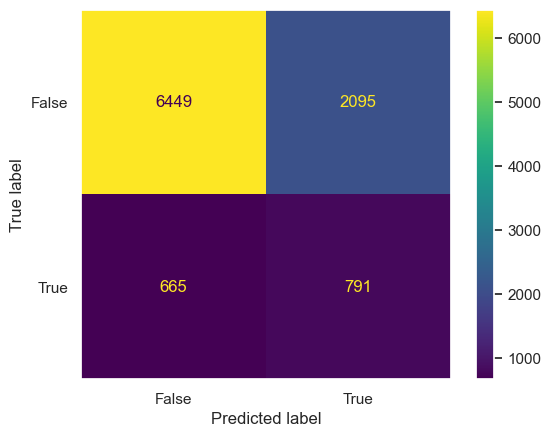

GaussianNB
500
Accuracy: 0.441
Precision: 0.19047619047619047
Recall (Sensitivity): 0.8736263736263736
Specificity: 0.3672752808988764
F1-Score: 0.3127612490779444


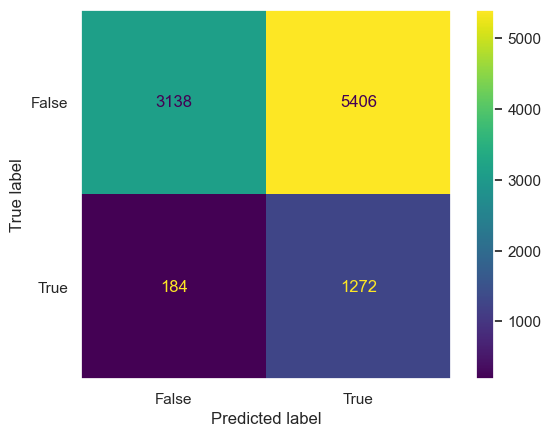

GaussianNB
700
Accuracy: 0.3004
Precision: 0.16553972470417774
Recall (Sensitivity): 0.9416208791208791
Specificity: 0.19112827715355804
F1-Score: 0.28157732593961804


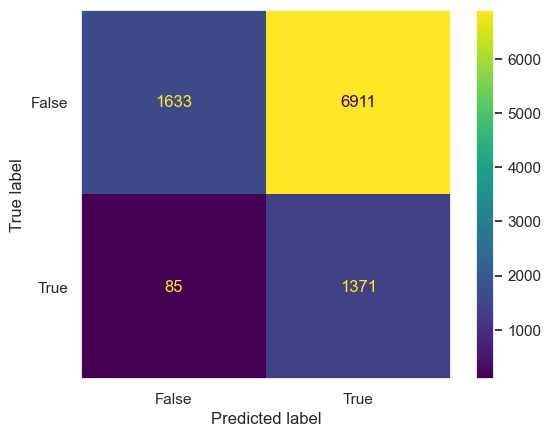

GaussianNB
900
Accuracy: 0.2448
Precision: 0.157605032576949
Recall (Sensitivity): 0.9635989010989011
Specificity: 0.12230805243445693
F1-Score: 0.2709017184784707


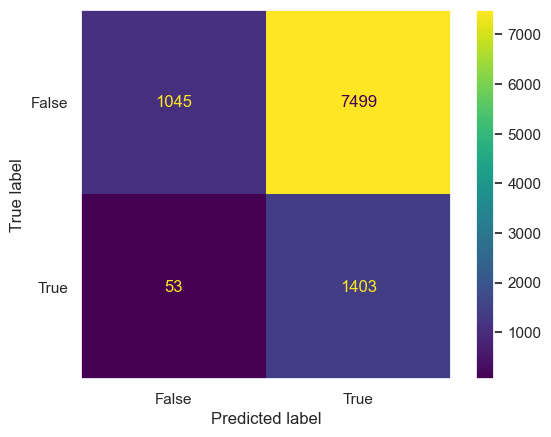

DecisionTreeClassifier
1
Accuracy: 0.854
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 0.9995318352059925
F1-Score: 0.0


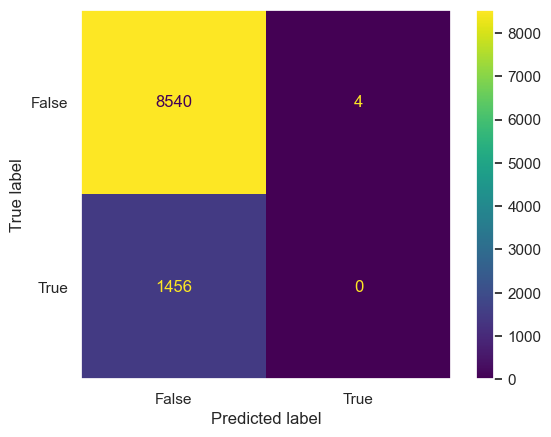

DecisionTreeClassifier
5
Accuracy: 0.7817
Precision: 0.24238128986534374
Recall (Sensitivity): 0.2348901098901099
Specificity: 0.8748829588014981
F1-Score: 0.23857690966166725


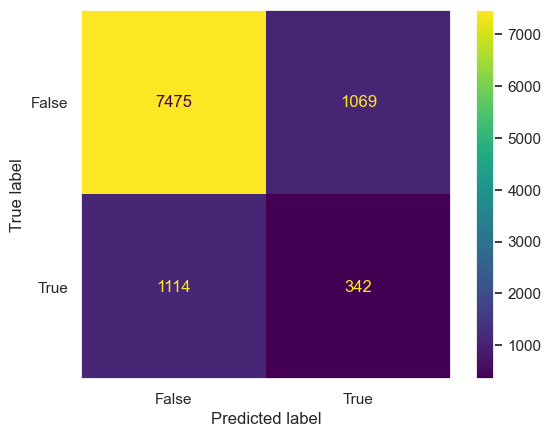

DecisionTreeClassifier
10
Accuracy: 0.7713
Precision: 0.24176507147296458
Recall (Sensitivity): 0.26717032967032966
Specificity: 0.8572097378277154
F1-Score: 0.2538336052202284


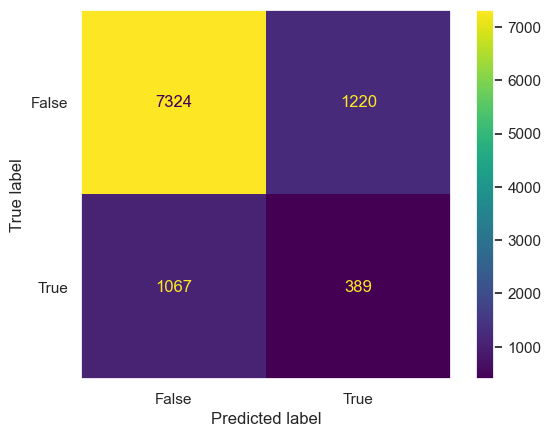

DecisionTreeClassifier
20
Accuracy: 0.7776
Precision: 0.2456953642384106
Recall (Sensitivity): 0.2548076923076923
Specificity: 0.8666900749063671
F1-Score: 0.2501685772083615


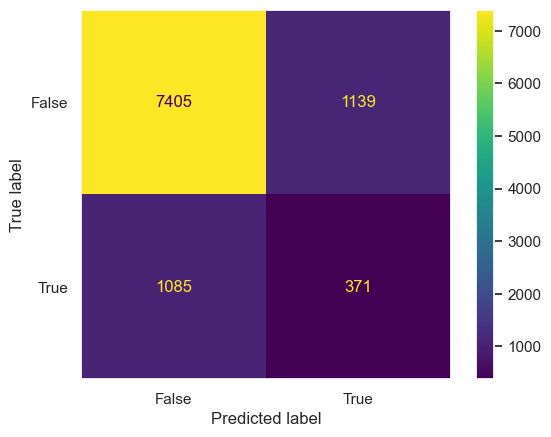

DecisionTreeClassifier
50
Accuracy: 0.7813
Precision: 0.2694006309148265
Recall (Sensitivity): 0.2932692307692308
Specificity: 0.8644662921348315
F1-Score: 0.2808286747780336


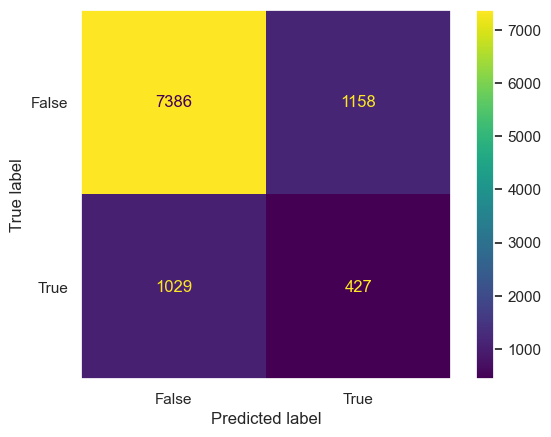

DecisionTreeClassifier
150
Accuracy: 0.7938
Precision: 0.2938775510204082
Recall (Sensitivity): 0.2967032967032967
Specificity: 0.8785112359550562
F1-Score: 0.29528366370471637


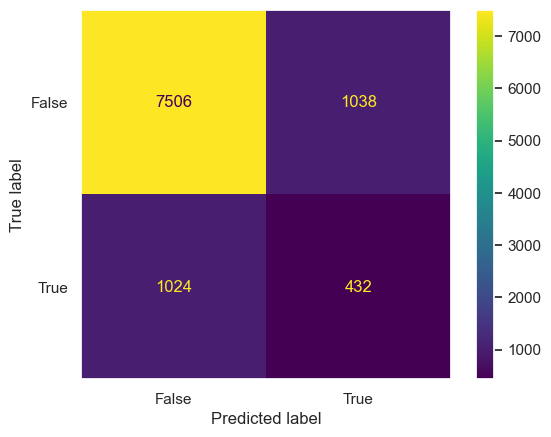

DecisionTreeClassifier
300
Accuracy: 0.7979
Precision: 0.30147575544624033
Recall (Sensitivity): 0.29464285714285715
Specificity: 0.8836610486891385
F1-Score: 0.2980201458839875


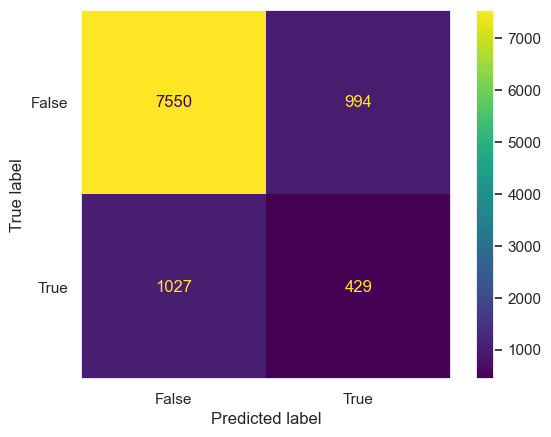

DecisionTreeClassifier
500
Accuracy: 0.7966
Precision: 0.2950354609929078
Recall (Sensitivity): 0.2857142857142857
Specificity: 0.8836610486891385
F1-Score: 0.29030006978367057


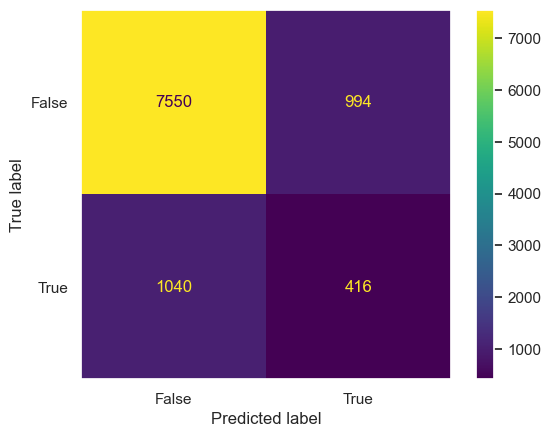

DecisionTreeClassifier
700
Accuracy: 0.7966
Precision: 0.2920863309352518
Recall (Sensitivity): 0.27884615384615385
Specificity: 0.8848314606741573
F1-Score: 0.2853127196064652


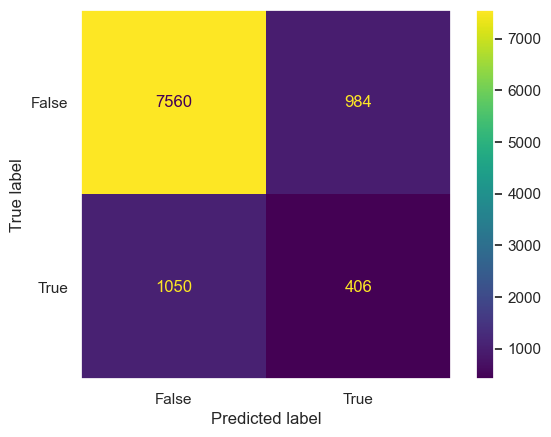

DecisionTreeClassifier
900
Accuracy: 0.7982
Precision: 0.3009915014164306
Recall (Sensitivity): 0.2918956043956044
Specificity: 0.8844803370786517
F1-Score: 0.29637377963737793


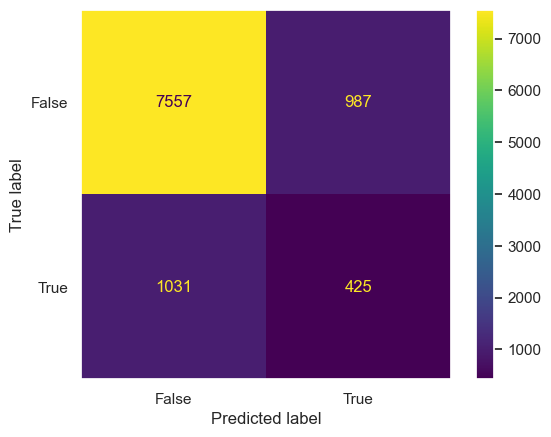

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier
1
Accuracy: 0.8293
Precision: 0.15041782729805014
Recall (Sensitivity): 0.03708791208791209
Specificity: 0.9643024344569289
F1-Score: 0.05950413223140496


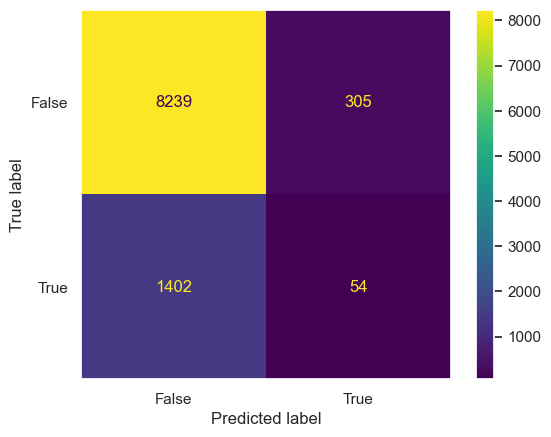

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier
5
Accuracy: 0.8354
Precision: 0.3321554770318021
Recall (Sensitivity): 0.12912087912087913
Specificity: 0.9557584269662921
F1-Score: 0.18595450049455983


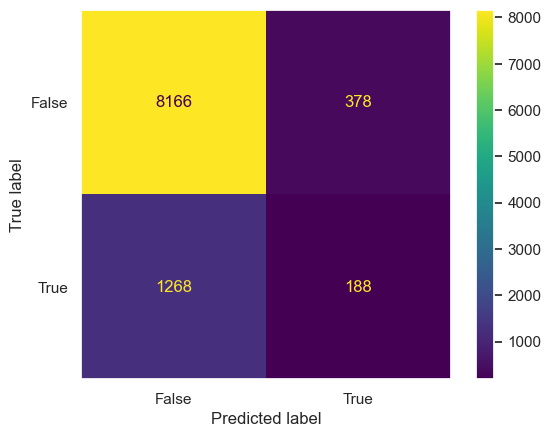

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier
10
Accuracy: 0.8354
Precision: 0.326007326007326
Recall (Sensitivity): 0.12225274725274725
Specificity: 0.9569288389513109
F1-Score: 0.1778221778221778


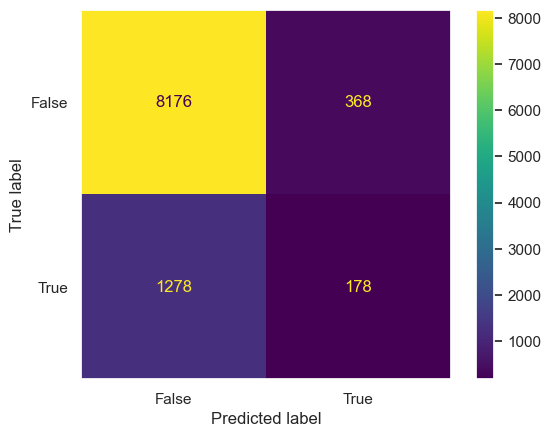

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier
20
Accuracy: 0.8345
Precision: 0.3045186640471513
Recall (Sensitivity): 0.10645604395604395
Specificity: 0.9585674157303371
F1-Score: 0.15776081424936383


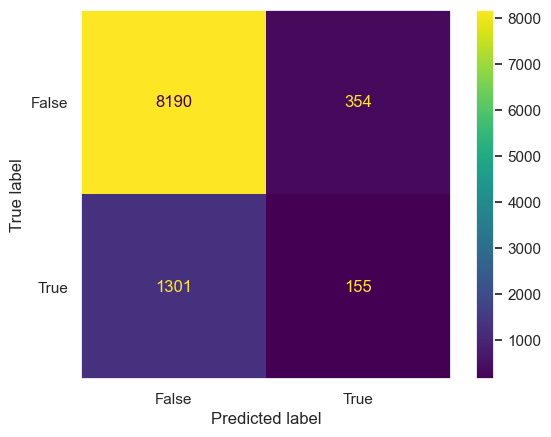

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier
50
Accuracy: 0.8373
Precision: 0.34137291280148424
Recall (Sensitivity): 0.12637362637362637
Specificity: 0.9584503745318352
F1-Score: 0.1844611528822055


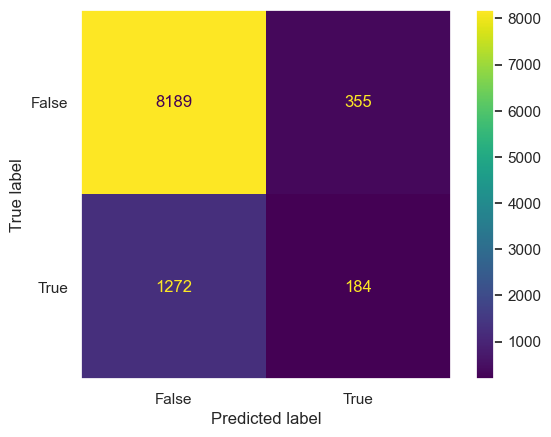

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier
150
Accuracy: 0.8392
Precision: 0.3509803921568627
Recall (Sensitivity): 0.12293956043956043
Specificity: 0.9612593632958801
F1-Score: 0.18209562563580872


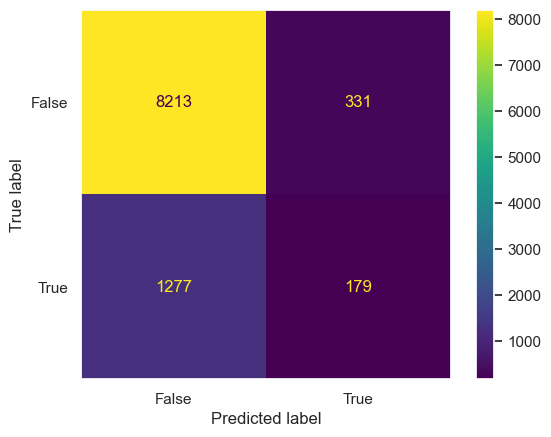

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier
300
Accuracy: 0.839
Precision: 0.3541666666666667
Recall (Sensitivity): 0.12843406593406592
Specificity: 0.9600889513108615
F1-Score: 0.18850806451612903


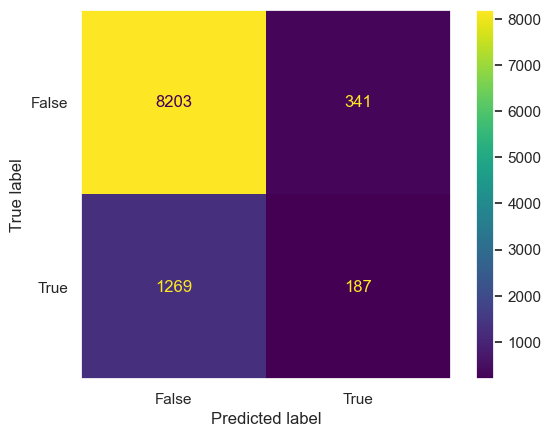

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier
500
Accuracy: 0.837
Precision: 0.35051546391752575
Recall (Sensitivity): 0.1401098901098901
Specificity: 0.9557584269662921
F1-Score: 0.20019627085377822


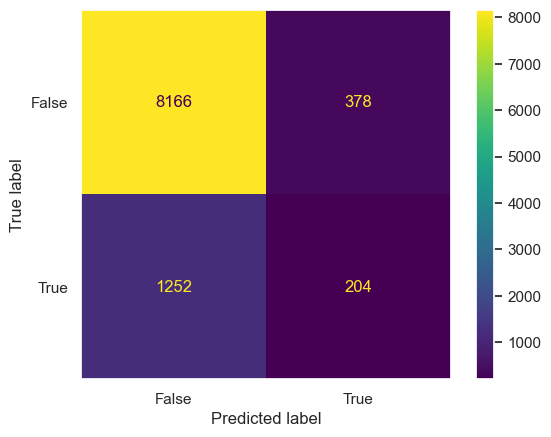

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier
700
Accuracy: 0.836
Precision: 0.3553459119496855
Recall (Sensitivity): 0.15521978021978022
Specificity: 0.9520131086142322
F1-Score: 0.21606118546845127


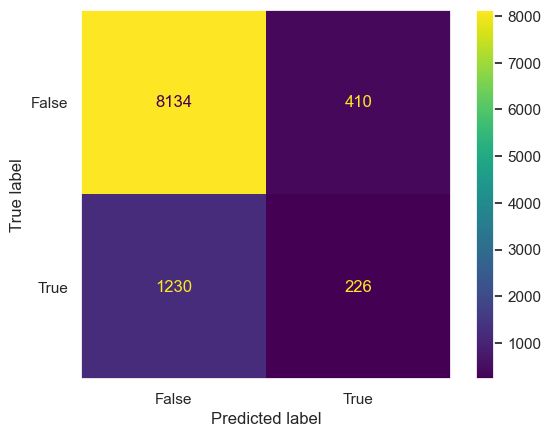

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier
900
Accuracy: 0.8344
Precision: 0.34894259818731116
Recall (Sensitivity): 0.15865384615384615
Specificity: 0.9495552434456929
F1-Score: 0.21813031161473084


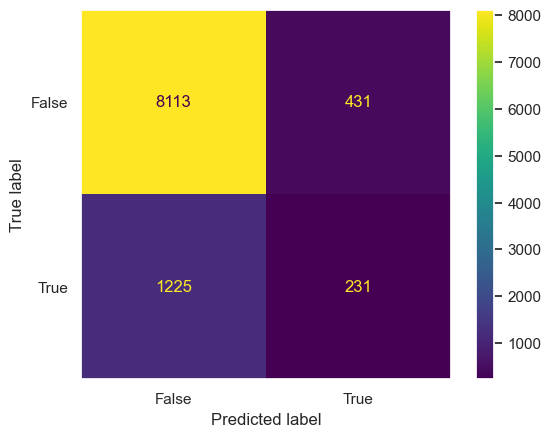

SVC
1
Accuracy: 0.8544
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 1.0
F1-Score: 0.0


C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


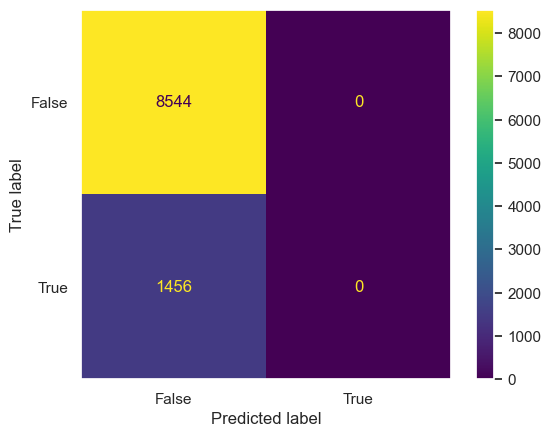

C:\Users\Chieng Bao Qing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC
5
Accuracy: 0.8539
Precision: 0.2222222222222222
Recall (Sensitivity): 0.0013736263736263737
Specificity: 0.9991807116104869
F1-Score: 0.0027303754266211604


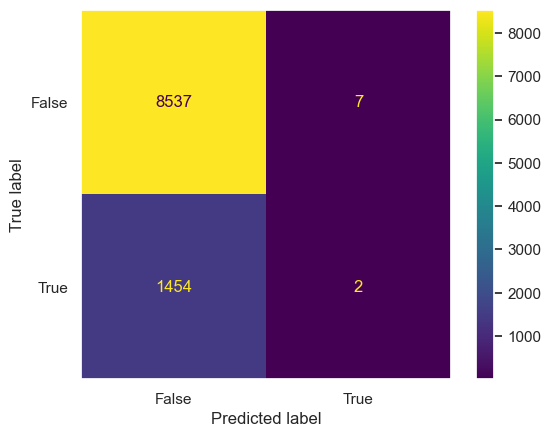

SVC
10
Accuracy: 0.8543
Precision: 0.3333333333333333
Recall (Sensitivity): 0.0006868131868131869
Specificity: 0.9997659176029963
F1-Score: 0.0013708019191226869


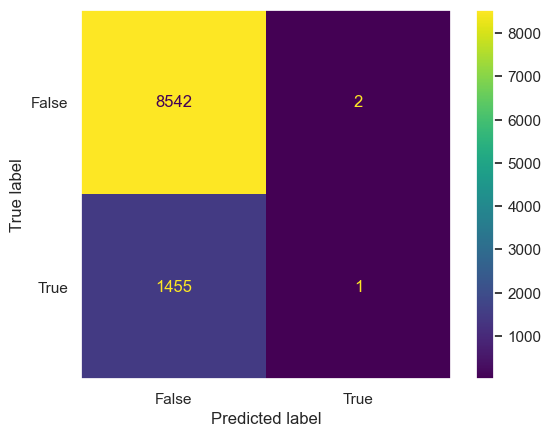

SVC
20
Accuracy: 0.8541
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 0.9996488764044944
F1-Score: 0.0


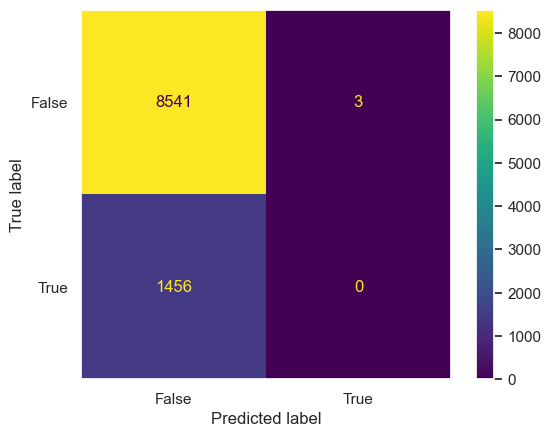

SVC
50
Accuracy: 0.8542
Precision: 0.4642857142857143
Recall (Sensitivity): 0.008928571428571428
Specificity: 0.9982443820224719
F1-Score: 0.01752021563342318


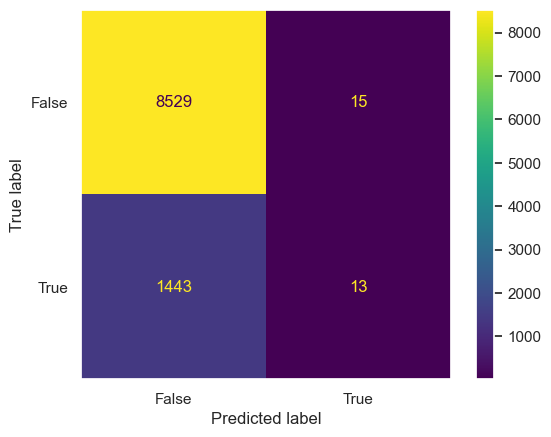

SVC
150
Accuracy: 0.8541
Precision: 0.4
Recall (Sensitivity): 0.004120879120879121
Specificity: 0.9989466292134831
F1-Score: 0.008157715839564922


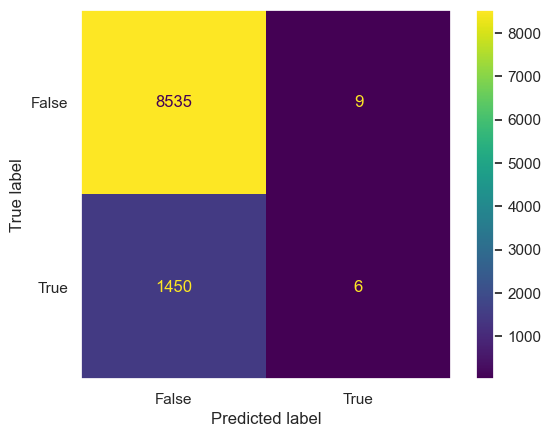

SVC
300
Accuracy: 0.8543
Precision: 0.47058823529411764
Recall (Sensitivity): 0.005494505494505495
Specificity: 0.9989466292134831
F1-Score: 0.010862186014935507


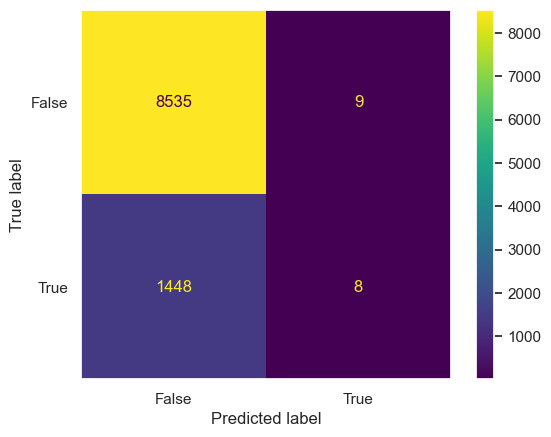

SVC
500
Accuracy: 0.8543
Precision: 0.47058823529411764
Recall (Sensitivity): 0.005494505494505495
Specificity: 0.9989466292134831
F1-Score: 0.010862186014935507


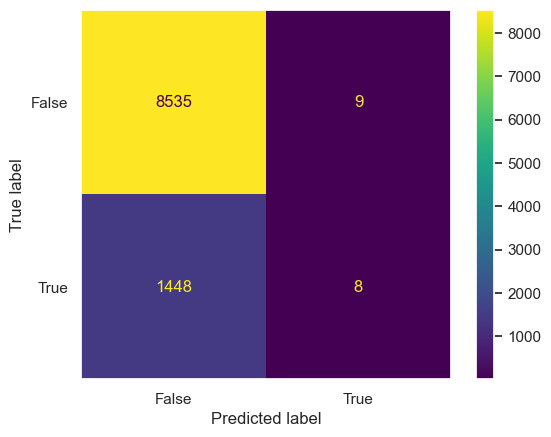

SVC
700
Accuracy: 0.8543
Precision: 0.47058823529411764
Recall (Sensitivity): 0.005494505494505495
Specificity: 0.9989466292134831
F1-Score: 0.010862186014935507


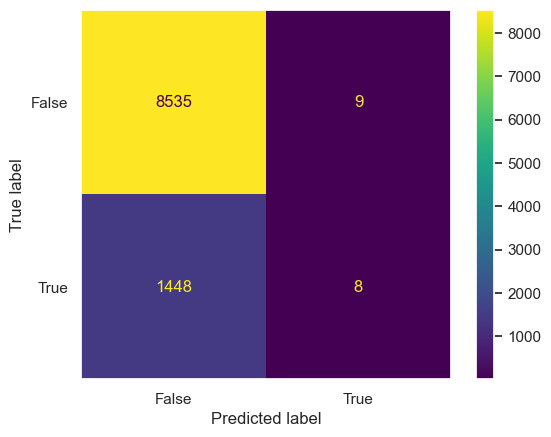

SVC
900
Accuracy: 0.8543
Precision: 0.47058823529411764
Recall (Sensitivity): 0.005494505494505495
Specificity: 0.9989466292134831
F1-Score: 0.010862186014935507


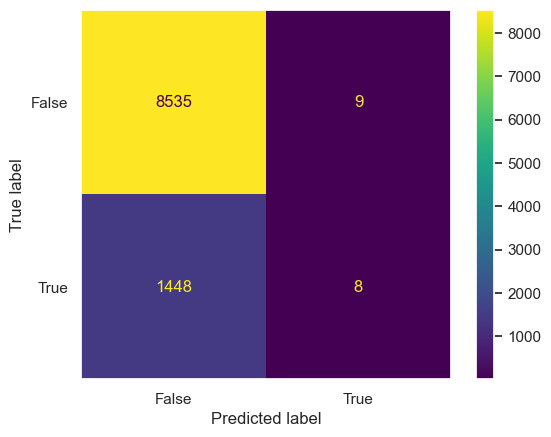

RandomForestClassifier
1
Accuracy: 0.8538
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 0.9992977528089888
F1-Score: 0.0


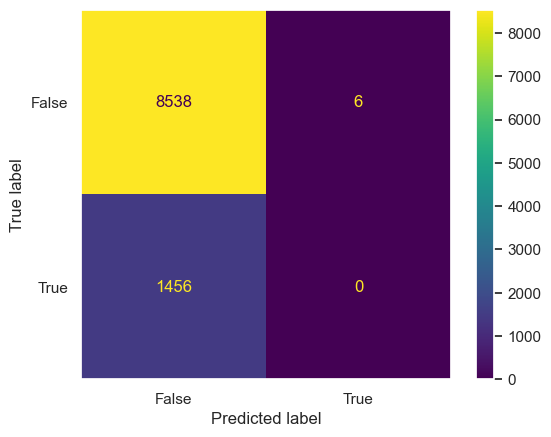

RandomForestClassifier
5
Accuracy: 0.812
Precision: 0.26018099547511314
Recall (Sensitivity): 0.15796703296703296
Specificity: 0.9234550561797753
F1-Score: 0.19658119658119658


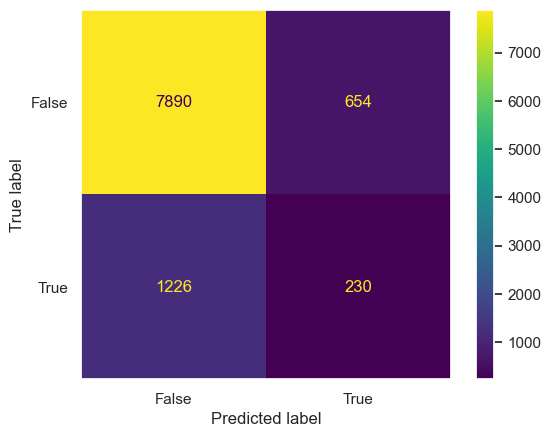

RandomForestClassifier
10
Accuracy: 0.8309
Precision: 0.31437598736176936
Recall (Sensitivity): 0.13667582417582416
Specificity: 0.9492041198501873
F1-Score: 0.19052178075634274


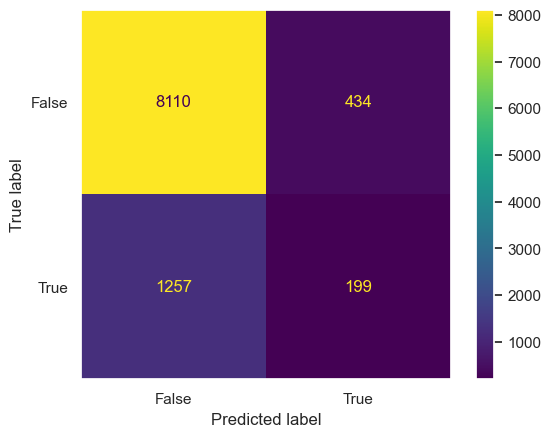

RandomForestClassifier
20
Accuracy: 0.846
Precision: 0.3757396449704142
Recall (Sensitivity): 0.08722527472527472
Specificity: 0.9753043071161048
F1-Score: 0.1415830546265329


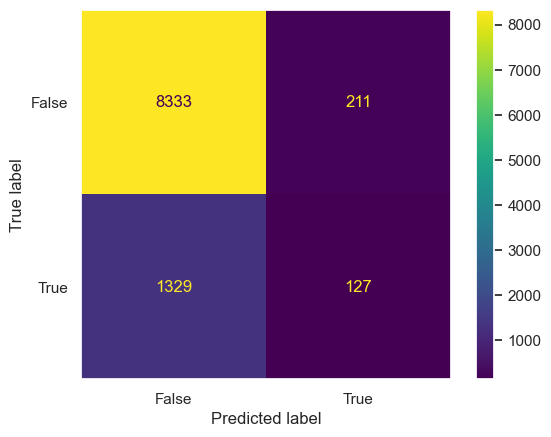

RandomForestClassifier
50
Accuracy: 0.853
Precision: 0.47635135135135137
Recall (Sensitivity): 0.09684065934065934
Specificity: 0.9818586142322098
F1-Score: 0.16095890410958902


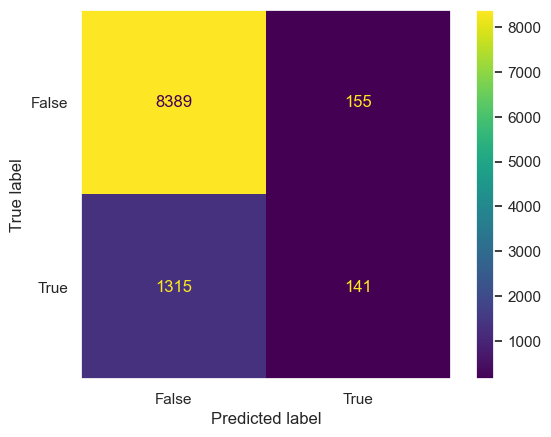

RandomForestClassifier
150
Accuracy: 0.8522
Precision: 0.4607142857142857
Recall (Sensitivity): 0.0885989010989011
Specificity: 0.9823267790262172
F1-Score: 0.14861751152073735


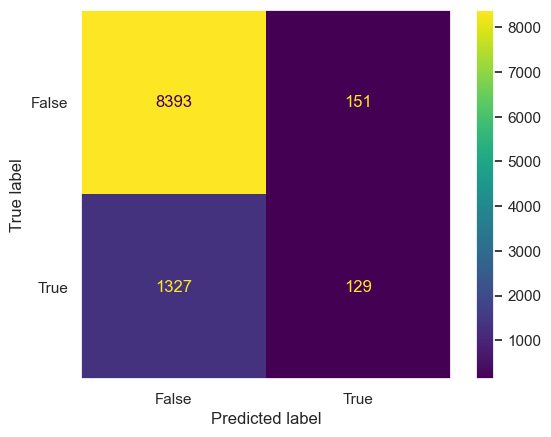

RandomForestClassifier
300
Accuracy: 0.8539
Precision: 0.4911660777385159
Recall (Sensitivity): 0.09546703296703296
Specificity: 0.9831460674157303
F1-Score: 0.15986198964922366


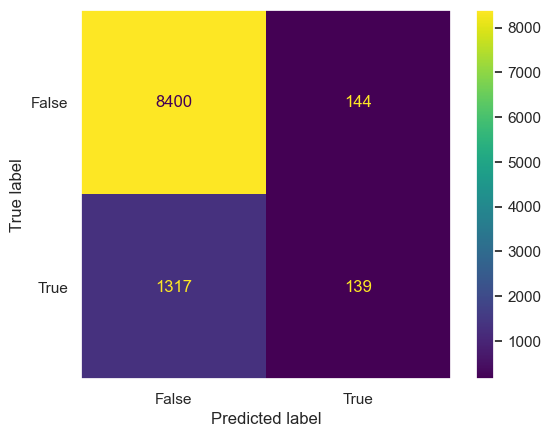

RandomForestClassifier
500
Accuracy: 0.8514
Precision: 0.44525547445255476
Recall (Sensitivity): 0.08379120879120878
Specificity: 0.9822097378277154
F1-Score: 0.14104046242774565


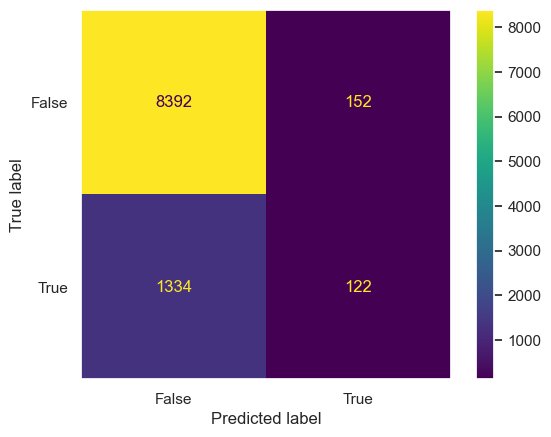

RandomForestClassifier
700
Accuracy: 0.8516
Precision: 0.4461538461538462
Recall (Sensitivity): 0.07967032967032966
Specificity: 0.9831460674157303
F1-Score: 0.13519813519813517


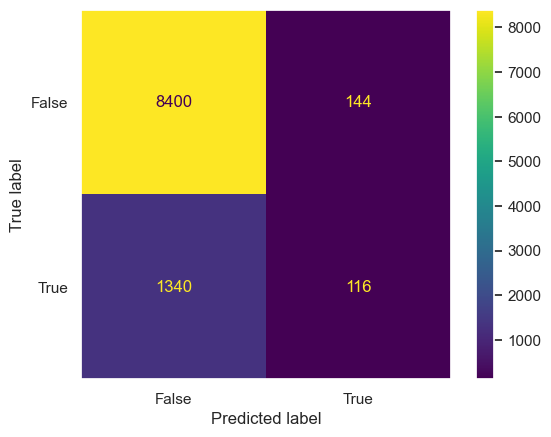

RandomForestClassifier
900
Accuracy: 0.852
Precision: 0.45121951219512196
Recall (Sensitivity): 0.07623626373626374
Specificity: 0.9841994382022472
F1-Score: 0.13043478260869568


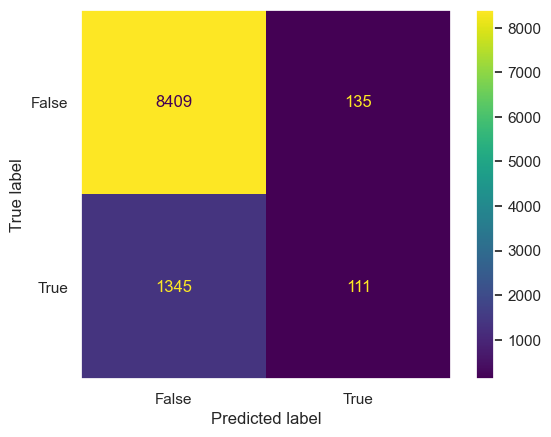

GradientBoostingClassifier
1
Accuracy: 0.8543
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 0.9998829588014981
F1-Score: 0.0


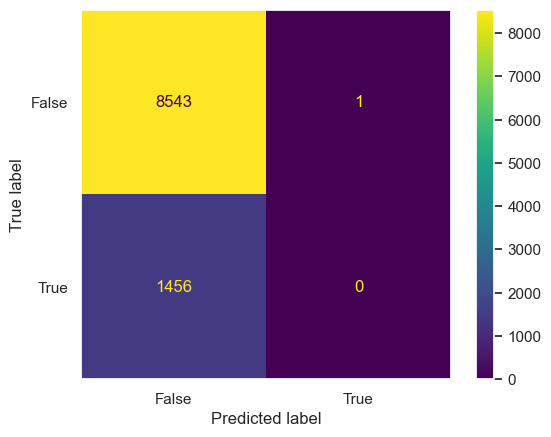

GradientBoostingClassifier
5
Accuracy: 0.854
Precision: 0.3
Recall (Sensitivity): 0.0020604395604395605
Specificity: 0.9991807116104869
F1-Score: 0.004092769440654843


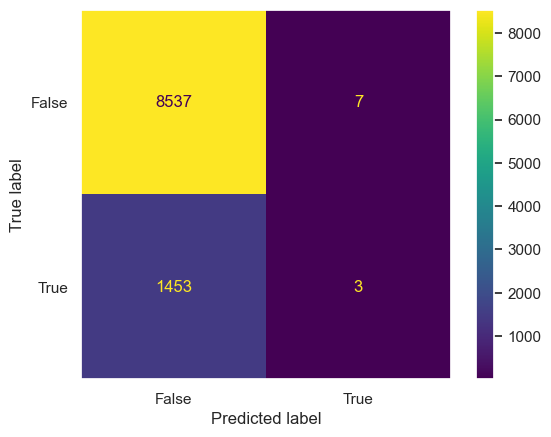

GradientBoostingClassifier
10
Accuracy: 0.8535
Precision: 0.4
Recall (Sensitivity): 0.012362637362637362
Specificity: 0.9968398876404494
F1-Score: 0.02398401065956029


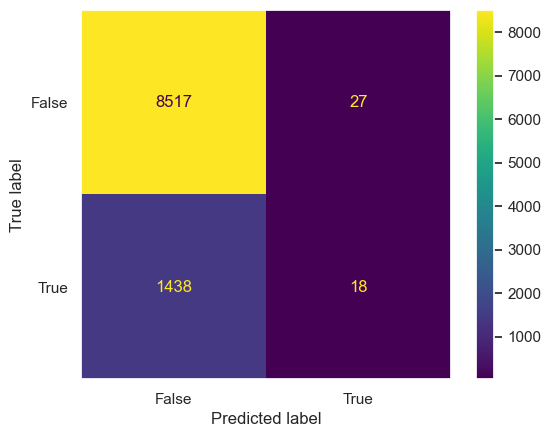

GradientBoostingClassifier
20
Accuracy: 0.8544
Precision: 0.5
Recall (Sensitivity): 0.02403846153846154
Specificity: 0.9959035580524345
F1-Score: 0.045871559633027525


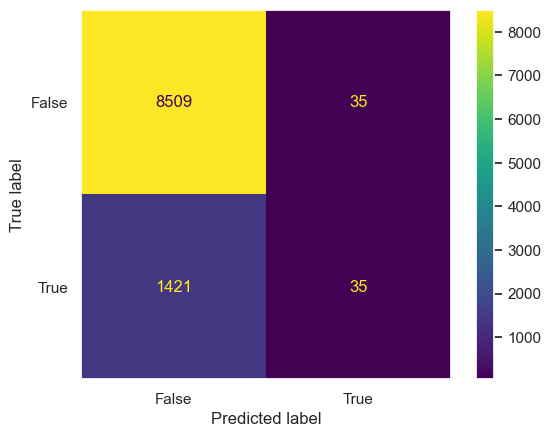

GradientBoostingClassifier
50
Accuracy: 0.8542
Precision: 0.48936170212765956
Recall (Sensitivity): 0.03159340659340659
Specificity: 0.9943820224719101
F1-Score: 0.059354838709677414


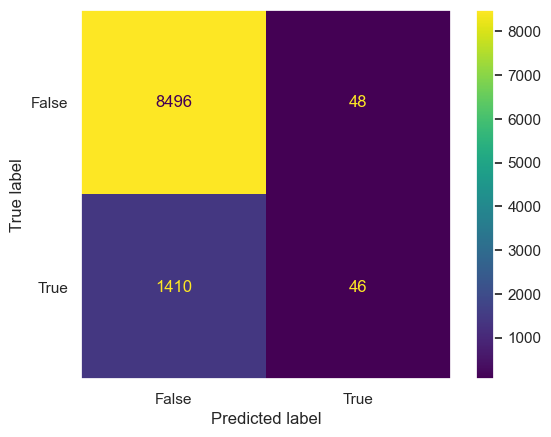

GradientBoostingClassifier
150
Accuracy: 0.8535
Precision: 0.42857142857142855
Recall (Sensitivity): 0.018543956043956044
Specificity: 0.9957865168539326
F1-Score: 0.035549703752468735


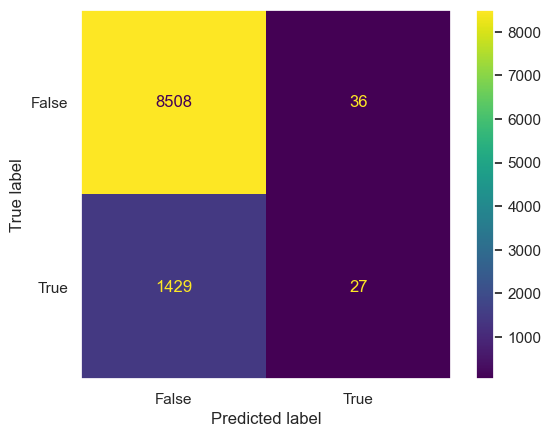

GradientBoostingClassifier
300
Accuracy: 0.8537
Precision: 0.43859649122807015
Recall (Sensitivity): 0.017170329670329672
Specificity: 0.9962546816479401
F1-Score: 0.03304692663582287


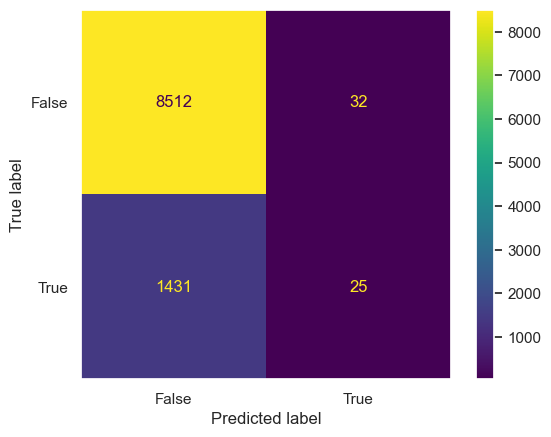

GradientBoostingClassifier
500
Accuracy: 0.8541
Precision: 0.4745762711864407
Recall (Sensitivity): 0.019230769230769232
Specificity: 0.9963717228464419
F1-Score: 0.03696369636963697


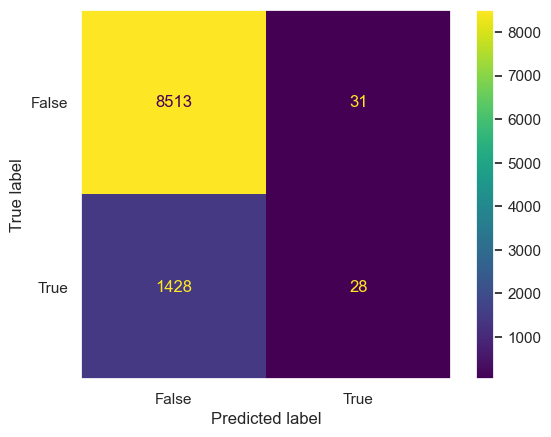

GradientBoostingClassifier
700
Accuracy: 0.8534
Precision: 0.4166666666666667
Recall (Sensitivity): 0.017170329670329672
Specificity: 0.9959035580524345
F1-Score: 0.032981530343007916


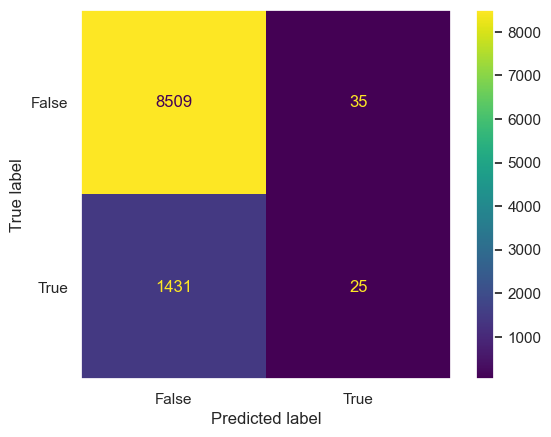

GradientBoostingClassifier
900
Accuracy: 0.8534
Precision: 0.4166666666666667
Recall (Sensitivity): 0.017170329670329672
Specificity: 0.9959035580524345
F1-Score: 0.032981530343007916


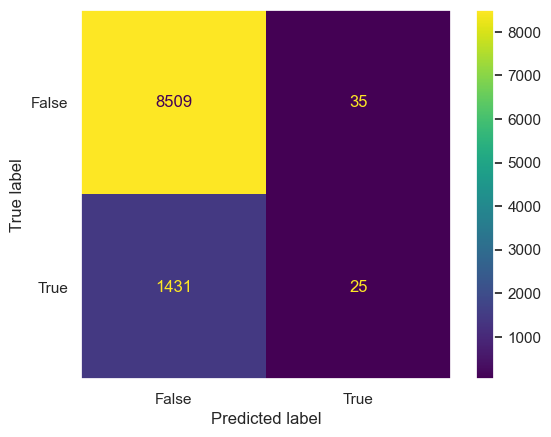

XGBClassifier
1
Accuracy: 0.8543
Precision: 0.0
Recall (Sensitivity): 0.0
Specificity: 0.9998829588014981
F1-Score: 0.0


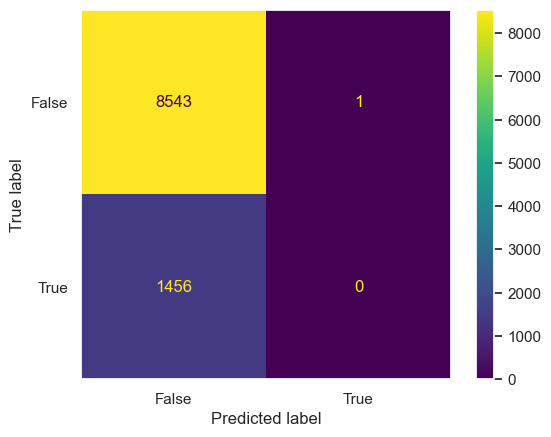

XGBClassifier
5
Accuracy: 0.85
Precision: 0.34507042253521125
Recall (Sensitivity): 0.03365384615384615
Specificity: 0.9891151685393258
F1-Score: 0.061326658322903634


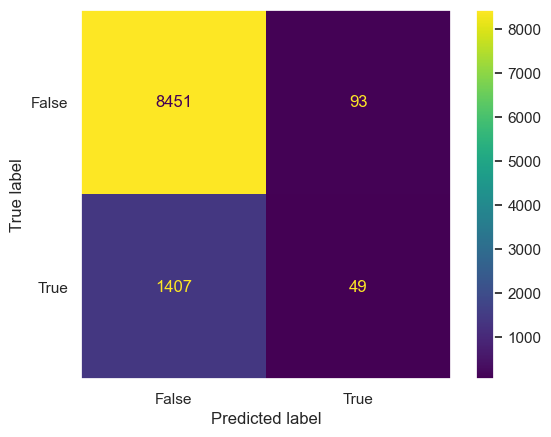

XGBClassifier
10
Accuracy: 0.8483
Precision: 0.3568075117370892
Recall (Sensitivity): 0.0521978021978022
Specificity: 0.9839653558052435
F1-Score: 0.09107249850209707


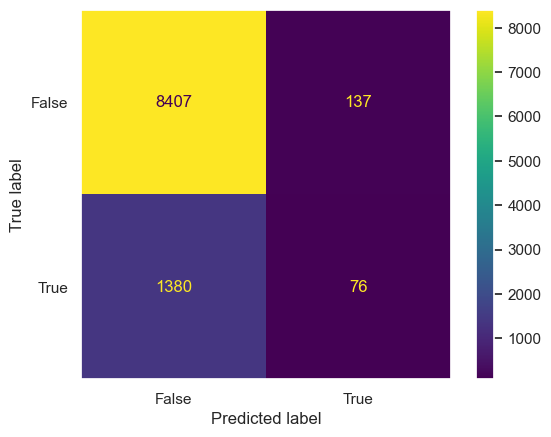

XGBClassifier
20
Accuracy: 0.8499
Precision: 0.41509433962264153
Recall (Sensitivity): 0.07554945054945054
Specificity: 0.9818586142322098
F1-Score: 0.12783265543288783


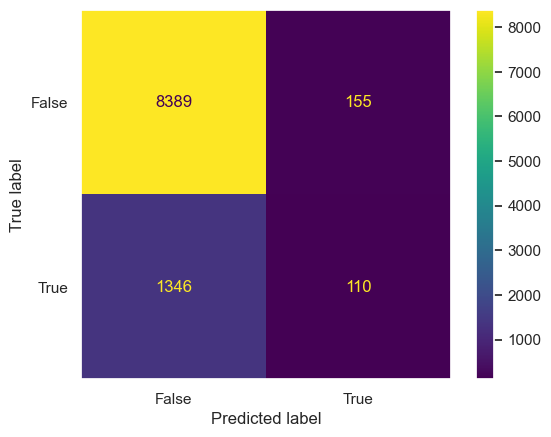

XGBClassifier
50
Accuracy: 0.8492
Precision: 0.42024539877300615
Recall (Sensitivity): 0.09409340659340659
Specificity: 0.9778792134831461
F1-Score: 0.1537598204264871


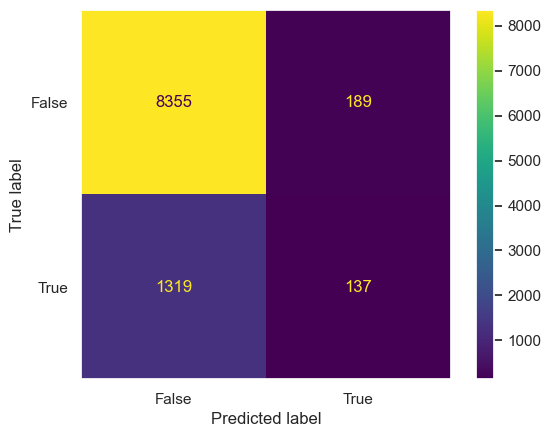

XGBClassifier
150
Accuracy: 0.8501
Precision: 0.4362017804154303
Recall (Sensitivity): 0.10096153846153846
Specificity: 0.9777621722846442
F1-Score: 0.16397099832682654


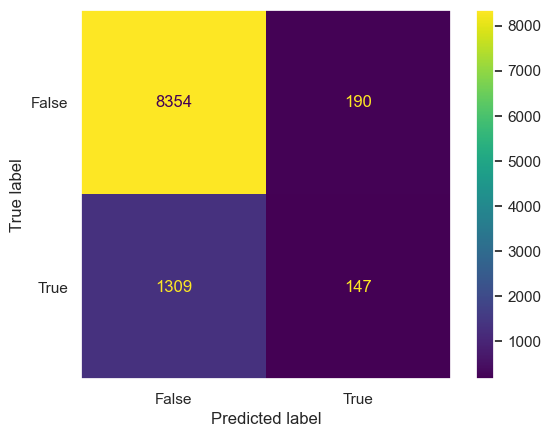

XGBClassifier
300
Accuracy: 0.852
Precision: 0.45774647887323944
Recall (Sensitivity): 0.08928571428571429
Specificity: 0.9819756554307116
F1-Score: 0.14942528735632185


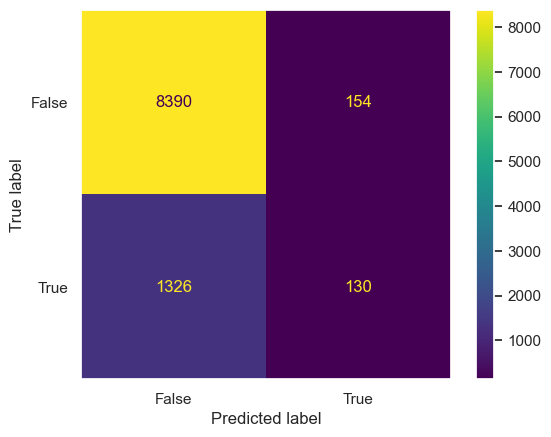

XGBClassifier
500
Accuracy: 0.853
Precision: 0.4715447154471545
Recall (Sensitivity): 0.07967032967032966
Specificity: 0.9847846441947565
F1-Score: 0.136310223266745


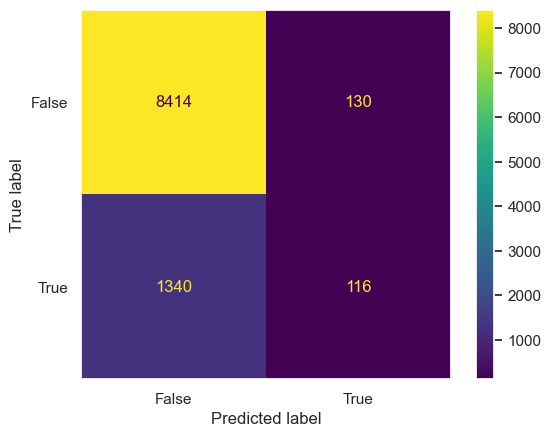

XGBClassifier
700
Accuracy: 0.8534
Precision: 0.48031496062992124
Recall (Sensitivity): 0.08379120879120878
Specificity: 0.9845505617977528
F1-Score: 0.14269005847953214


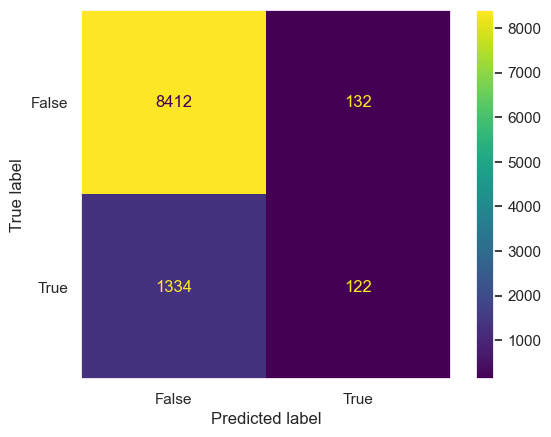

XGBClassifier
900
Accuracy: 0.8534
Precision: 0.48031496062992124
Recall (Sensitivity): 0.08379120879120878
Specificity: 0.9845505617977528
F1-Score: 0.14269005847953214


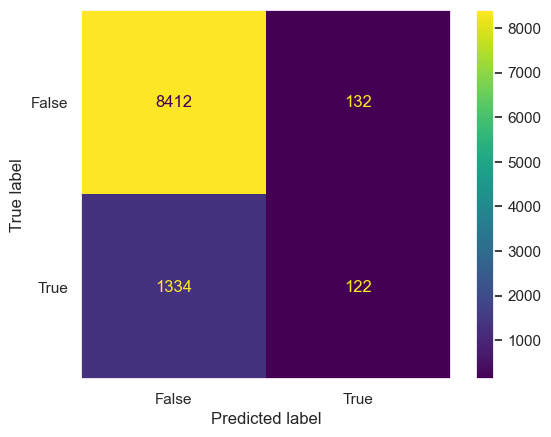

In [35]:
# Initialize the models
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000,random_state=28),
    'GaussianNB': GaussianNB(),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=28),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(random_state=28),
    'RandomForestClassifier': RandomForestClassifier(random_state=28),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=28),
    'XGBClassifier': XGBClassifier(random_state=28)
}

# Dictionary to store results
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'Specificity': [],
    'F1 Score': [],
    'n_features':[],
    'fp':[],
    'tp':[],
    'tn':[],
    'fn':[],
}

# Loop through models, fit, predict, and calculate scores
for model_name, model in models.items():
    for i in [1,5,10,20, 50, 150, 300, 500, 700, 900]:
        X_features = X[:,feature_importances_rf_all.head(i)['index'].to_list()]
        X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=1)
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        print(model_name)
        print(i)
        scores(y_val, y_pred)
        confusion_matrix_(y_val,y_pred) 

    
        cm = confusion_matrix(y_val, y_pred)
        tn, fp, fn, tp = cm.ravel()
        accuracy = accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred)
        specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
        f1 = f1_score(y_val, y_pred)
    
        results['Model'].append(model_name)
        results['Accuracy'].append(accuracy)
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['Specificity'].append(specificity)
        results['F1 Score'].append(f1)
        results['n_features'].append(i)
        results['fp'].append(fp)
        results['tp'].append(tp)
        results['tn'].append(tn)
        results['fn'].append(fn)



# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

In [36]:
results_df.sort_values(by=["F1 Score"], ascending=False).head()

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,n_features,fp,tp,tn,fn
16,GaussianNB,0.7240,0.274082,0.543269,0.754799,0.364348,300,2095,791,6449,665
15,GaussianNB,0.7378,0.278327,0.502747,0.777856,0.358297,150,1898,732,6646,724
11,GaussianNB,0.8127,0.346352,0.322802,0.896184,0.334163,5,887,470,7657,986
12,GaussianNB,0.8104,0.341499,0.325549,0.893024,0.333333,10,914,474,7630,982
13,GaussianNB,0.8138,0.348054,0.319368,0.898057,0.333095,20,871,465,7673,991


In [37]:
results_df.groupby(['Model'])["F1 Score"].agg(['max']).sort_values(['max'], ascending=False)

,max
Model,
GaussianNB,0.364348
DecisionTreeClassifier,0.298020
KNeighborsClassifier,0.218130
RandomForestClassifier,0.196581
XGBClassifier,0.163971
LogisticRegression,0.130874
GradientBoostingClassifier,0.059355
SVC,0.017520


In [38]:
max_f1_scores = results_df.groupby('Model')['F1 Score'].transform(max)
max_f1_rows = results_df[results_df['F1 Score'] == max_f1_scores]

In [39]:
max_f1_rows.sort_values(by=["F1 Score"], ascending=False).style.background_gradient(axis=0, gmap=max_f1_rows["F1 Score"], cmap='YlOrRd')  

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,n_features,fp,tp,tn,fn
16,GaussianNB,0.724000,0.274082,0.543269,0.754799,0.364348,300,2095,791,6449,665
26,DecisionTreeClassifier,0.797900,0.301476,0.294643,0.883661,0.298020,300,994,429,7550,1027
39,KNeighborsClassifier,0.834400,0.348943,0.158654,0.949555,0.218130,900,431,231,8113,1225
51,RandomForestClassifier,0.812000,0.260181,0.157967,0.923455,0.196581,5,654,230,7890,1226
75,XGBClassifier,0.850100,0.436202,0.100962,0.977762,0.163971,150,190,147,8354,1309
9,LogisticRegression,0.853900,0.488889,0.075549,0.986540,0.130874,900,115,110,8429,1346
64,GradientBoostingClassifier,0.854200,0.489362,0.031593,0.994382,0.059355,50,48,46,8496,1410
44,SVC,0.854200,0.464286,0.008929,0.998244,0.017520,50,15,13,8529,1443


<font face="Comfortaa"> The F1-Score takes into account both precision and recall and provides a balanced measure of a model's performance. It's interesting to note that GaussianNB, when using the top 300 important features ranked by RandomForestClassifier, performs slightly better than other models in terms of F1 Score. Additionally, it's remarkable that RandomForestClassifier can achieve better performance than XGBClassifier, LogisticRegression, GradientBoostingClassifier, and SVC with just the top 5 important features under these conditions.<br>Given these observations, it seems like a promising strategy to further hyperparameter tune GaussianNB in order to potentially enhance its performance. Fine-tuning the model can help it leverage the important features more effectively and may lead to even better results in your specific context.

<font face="Comfortaa"><h3> 4.3 Hyperparameter Tuning

In [40]:
X_features = X[:,feature_importances_rf_all.head(300)['index'].to_list()]
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [42]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
clf=GaussianNB()
param_grid = {
    'priors': [None, [0.2, 0.8], [0.5, 0.5], [0.8, 0.2]],\
    'var_smoothing': np.logspace(0,-9, num=100)
}
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='f1_macro', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


In [43]:
best_params

{'priors': None, 'var_smoothing': 0.02848035868435802}

In [44]:
best_model

GaussianNB(var_smoothing=0.02848035868435802)

Accuracy: 0.7878
Precision: 0.3269230769230769
Recall (Sensitivity): 0.4320054945054945
Specificity: 0.8484316479400749
F1-Score: 0.37218934911242607


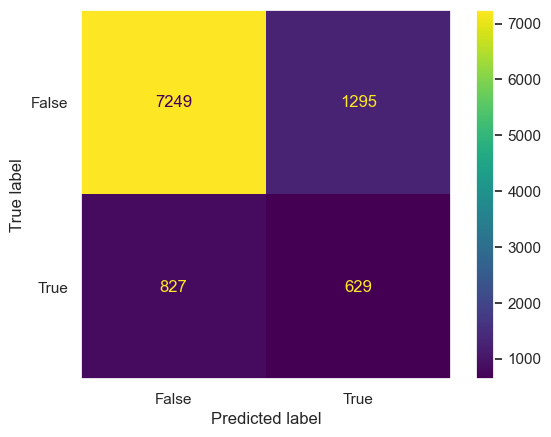

In [45]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(var_smoothing=0.02848035868435802)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_val)
scores(y_val, y_pred)
confusion_matrix_(y_val,y_pred) 

<font face='Comfortaa'> It appears that even though GaussianNB has limited hyperparameters to tune, optimizing the priors and var_smoothing parameters has led to a slight improvement in its performance, particularly when assessing the F1 Score. This outcome suggests that fine-tuning these specific hyperparameters has had a positive impact on the GaussianNB model's ability to make accurate predictions compared to the previous configuration.

<font face="Comfortaa"><h3> 4.3 Test Set Performance

Accuracy: 0.7853
Precision: 0.33537519142419603
Recall (Sensitivity): 0.4374167776298269
Specificity: 0.8467874794069192
F1-Score: 0.37965905807570066


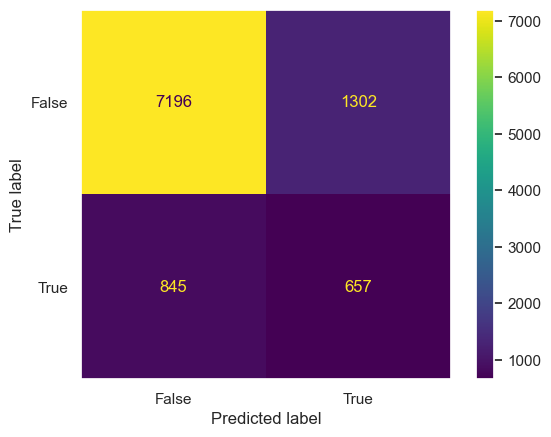

In [48]:
y_pred = gnb.predict(X_test)
scores(y_test, y_pred)
confusion_matrix_(y_test,y_pred) 

<font face = 'Comfortaa'><h1> Conclusion: </h1>
    <p> In retrospect, it's worth noting that, in this particular scenario, GaussianNB with hyperparameter tuning demonstrated a slightly superior performance compared to other classification methods. Interestingly, even when using a reduced set of features, the RandomForestClassifier still outperformed the XGBClassifier, LogisticRegression, GradientBoostingClassifier, and SVC.